<a href="https://colab.research.google.com/github/lcury01/PNAD/blob/main/2025_1Trim_definicao_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PNAD - Pesquisa Nacional de Domicilios
A PNAD coleta dados de 210.000 domicilios em 3.500 municípios brasileiros trimestralemnte e traz dados sócio-econômicos que podem ser usados em análise de séries históricas.
Dados sobre escolaridade e mercado de trabalho são atualizados trimenstralmente.
Recebimento de benefícios federais e indicadores sócio econômicos Tem cronograma de atualização anual.

CHAVES
Domicílio -> UPA + V1008 + V1014

Pessoa -> UPA + V1008 + V1014 + V2003.

# Leitura dos dados originais PNAD
Leitura dados PNAD 1o Trimestre de 2025, análise exploratório e definição da técnica de transformação dos dados que será aplicada num pipeline de dados do ano de 2025.

O objetivo deste trabaho é a cnstrução de dashboards e, neste momento, as informação não serão utilizadas em machine learning.

In [1]:
# Leitura dos dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
COLS_W = (4,1,2,2,2,9,7,2,2,1,1,1,15,15,9,9,3,3,2,2,2,1,2,2,4,3,1,1,1,1,2,2,1,1,1,2,1,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,4,1,1,5,1,1,1,1,1,1,2,1,1,2,2,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,8,1,1,8,1,1,1,1,1,8,1,1,8,3,3,1,2,2,2,4,1,1,5,1,1,1,1,1,1,1,1,8,1,1,8,1,1,1,1,1,8,1,1,8,3,3,1,1,1,1,8,1,1,8,1,1,1,1,1,1,8,1,1,8,3,3,1,1,1,1,1,2,1,1,1,2,1,2,1,2,2,2,1,1,1,1,2,2,1,2,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,8,8,1,8,8,1,1,3,3,3,3,3,1,1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15)
COLS_N = ('Ano' , 'Trimestre' , 'UF' , 'Capital' , 'RM_RIDE' , 'UPA' , 'Estrato' , 'V1008' , 'V1014' , 'V1016' , 'V1022' , 'V1023' , 'V1027' , 'V1028' , 'V1029' , 'V1033' , 'posest' , 'posest_sxi' , 'V2001' , 'V2003' , 'V2005' , 'V2007' , 'V2008' , 'V20081' , 'V20082' , 'V2009' , 'V2010' , 'V3001' , 'V3002' , 'V3002A' , 'V3003' , 'V3003A' , 'V3004' , 'V3005' , 'V3005A' , 'V3006' , 'V3006A' , 'V3007' , 'V3008' , 'V3009' , 'V3009A' , 'V3010' , 'V3011' , 'V3011A' , 'V3012' , 'V3013' , 'V3013A' , 'V3013B' , 'V3014' , 'V4001' , 'V4002' , 'V4003' , 'V4004' , 'V4005' , 'V4006' , 'V4006A' , 'V4007' , 'V4008' , 'V40081' , 'V40082' , 'V40083' , 'V4009' , 'V4010' , 'V4012' , 'V40121' , 'V4013' , 'V40132' , 'V40132A' , 'V4014' , 'V4015' , 'V40151' , 'V401511' , 'V401512' , 'V4016' , 'V40161' , 'V40162' , 'V40163' , 'V4017' , 'V40171' , 'V401711' , 'V4018' , 'V40181' , 'V40182' , 'V40183' , 'V4019' , 'V4020' , 'V4021' , 'V4022' , 'V4024' , 'V4025' , 'V4026' , 'V4027' , 'V4028' , 'V4029' , 'V4032' , 'V4033' , 'V40331' , 'V403311' , 'V403312' , 'V40332' , 'V403321' , 'V403322' , 'V40333' , 'V403331' , 'V4034' , 'V40341' , 'V403411' , 'V403412' , 'V40342' , 'V403421' , 'V403422' , 'V4039' , 'V4039C' , 'V4040' , 'V40401' , 'V40402' , 'V40403' , 'V4041' , 'V4043' , 'V40431' , 'V4044' , 'V4045' , 'V4046' , 'V4047' , 'V4048' , 'V4049' , 'V4050' , 'V40501' , 'V405011' , 'V405012' , 'V40502' , 'V405021' , 'V405022' , 'V40503' , 'V405031' , 'V4051' , 'V40511' , 'V405111' , 'V405112' , 'V40512' , 'V405121' , 'V405122' , 'V4056' , 'V4056C' , 'V4057' , 'V4058' , 'V40581' , 'V405811' , 'V405812' , 'V40582' , 'V405821' , 'V405822' , 'V40583' , 'V405831' , 'V40584' , 'V4059' , 'V40591' , 'V405911' , 'V405912' , 'V40592' , 'V405921' , 'V405922' , 'V4062' , 'V4062C' , 'V4063' , 'V4063A' , 'V4064' , 'V4064A' , 'V4071' , 'V4072' , 'V4072A' , 'V4073' , 'V4074' , 'V4074A' , 'V4075A' , 'V4075A1' , 'V4076' , 'V40761' , 'V40762' , 'V40763' , 'V4077' , 'V4078' , 'V4078A' , 'V4082' , 'VD2002' , 'VD2003' , 'VD2004' , 'VD2006' , 'VD3004' , 'VD3005' , 'VD3006' , 'VD4001' , 'VD4002' , 'VD4003' , 'VD4004' , 'VD4004A' , 'VD4005' , 'VD4007' , 'VD4008' , 'VD4009' , 'VD4010' , 'VD4011' , 'VD4012' , 'VD4013' , 'VD4014' , 'VD4015' , 'VD4016' , 'VD4017' , 'VD4018' , 'VD4019' , 'VD4020' , 'VD4023' , 'VD4030' , 'VD4031' , 'VD4032' , 'VD4033' , 'VD4034' , 'VD4035' , 'VD4036' , 'VD4037' , 'V1028001' , 'V1028002' , 'V1028003' , 'V1028004' , 'V1028005' , 'V1028006' , 'V1028007' , 'V1028008' , 'V1028009' , 'V1028010' , 'V1028011' , 'V1028012' , 'V1028013' , 'V1028014' , 'V1028015' , 'V1028016' , 'V1028017' , 'V1028018' , 'V1028019' , 'V1028020' , 'V1028021' , 'V1028022' , 'V1028023' , 'V1028024' , 'V1028025' , 'V1028026' , 'V1028027' , 'V1028028' , 'V1028029' , 'V1028030' , 'V1028031' , 'V1028032' , 'V1028033' , 'V1028034' , 'V1028035' , 'V1028036' , 'V1028037' , 'V1028038' , 'V1028039' , 'V1028040' , 'V1028041' , 'V1028042' , 'V1028043' , 'V1028044' , 'V1028045' , 'V1028046' , 'V1028047' , 'V1028048' , 'V1028049' , 'V1028050' , 'V1028051' , 'V1028052' , 'V1028053' , 'V1028054' , 'V1028055' , 'V1028056' , 'V1028057' , 'V1028058' , 'V1028059' , 'V1028060' , 'V1028061' , 'V1028062' , 'V1028063' , 'V1028064' , 'V1028065' , 'V1028066' , 'V1028067' , 'V1028068' , 'V1028069' , 'V1028070' , 'V1028071',
'V1028072' , 'V1028073' , 'V1028074' , 'V1028075' , 'V1028076' , 'V1028077' , 'V1028078' , 'V1028079' , 'V1028080' , 'V1028081' , 'V1028082' , 'V1028083' , 'V1028084' , 'V1028085' , 'V1028086' , 'V1028087' , 'V1028088' , 'V1028089' , 'V1028090' , 'V1028091' , 'V1028092' , 'V1028093' , 'V1028094' , 'V1028095' , 'V1028096' , 'V1028097' , 'V1028098' , 'V1028099' , 'V1028100' , 'V1028101' , 'V1028102' , 'V1028103' , 'V1028104' , 'V1028105' , 'V1028106' , 'V1028107' , 'V1028108' , 'V1028109' , 'V1028110' , 'V1028111' , 'V1028112' , 'V1028113' , 'V1028114' , 'V1028115' , 'V1028116' , 'V1028117' , 'V1028118' , 'V1028119' , 'V1028120' , 'V1028121' , 'V1028122' , 'V1028123' , 'V1028124' , 'V1028125' , 'V1028126' , 'V1028127' , 'V1028128' , 'V1028129' , 'V1028130' , 'V1028131' , 'V1028132' , 'V1028133' , 'V1028134' , 'V1028135' , 'V1028136' , 'V1028137' , 'V1028138' , 'V1028139' , 'V1028140' , 'V1028141' , 'V1028142' , 'V1028143' , 'V1028144' , 'V1028145' , 'V1028146' , 'V1028147' , 'V1028148' , 'V1028149' , 'V1028150' , 'V1028151' , 'V1028152' , 'V1028153' , 'V1028154' , 'V1028155' , 'V1028156' , 'V1028157' , 'V1028158' , 'V1028159' , 'V1028160' , 'V1028161' , 'V1028162' , 'V1028163' , 'V1028164' , 'V1028165' , 'V1028166' , 'V1028167' , 'V1028168' , 'V1028169' , 'V1028170' , 'V1028171' , 'V1028172' , 'V1028173' , 'V1028174' , 'V1028175' , 'V1028176' , 'V1028177' , 'V1028178' , 'V1028179' , 'V1028180' , 'V1028181' , 'V1028182' , 'V1028183' , 'V1028184' , 'V1028185' , 'V1028186' , 'V1028187' , 'V1028188' , 'V1028189' , 'V1028190' , 'V1028191' , 'V1028192' , 'V1028193' , 'V1028194' , 'V1028195' , 'V1028196' , 'V1028197' , 'V1028198' , 'V1028199' , 'V1028200')

In [3]:
df = pd.read_fwf('/content/drive/MyDrive/colab-files/IBGE-PNAD/PNADC_012025 2.txt', names=COLS_N, widths=COLS_W)

In [ ]:
df[['V2008','V20081','V20082']]

,V2008,V20081,V20082
0,26,9,2002
1,17,10,2001
2,21,12,1977
3,24,10,1978
4,23,10,2007
...,...,...,...
472362,12,1,1986
472363,7,1,1977
472364,26,4,2012
472365,28,10,1968


# Análise Exploratória Intermediária
A análise inicial levará 5 dias e para melhorar os tempos de execução, principalemnte o tempo de carga dos dados, iremos criar uma amostragem do arquivo usando dados de um estado.


## Criar dataset com informacoes de um estado
Executar apenas na primeira carga.


In [ ]:
dfsc = df.query( 'UF == 48')

/tmp/ipython-input-2929861247.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  dfsc = df.query( 'UF == 48')


In [ ]:
dfsc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 423 entries, Ano to Renda Familiar
dtypes: category(18), float64(403), object(2)
memory usage: 5.7+ KB


In [ ]:
dfsc.to_csv('/content/drive/MyDrive/colab-files/IBGE-PNAD/pnadsc2.csv', index=False)


## Leitura Dataset por estado
Carregar dados já filtrados

In [ ]:
## ler planilha que foi grava com dados da UF
import pandas as pd
dfsc = pd.read_csv('/content/drive/MyDrive/colab-files/IBGE-PNAD/pnadsc.csv')
dfsc.columns = dfsc.columns.str.strip()

In [ ]:
dfsc['Domicilio'] = dfsc['UPA'].astype(str) + dfsc['V1008'].astype(str) + dfsc['V1014'].astype(str)
dfsc['Pessoa'] = dfsc['Domicilio'] + dfsc['V2003'].astype(str)
#dfsc['Pessoa'] = dfsc['Pessoa'].astype(int)
#dfsc['Domicilio'] = dfsc['Domicilio'].astype(int)

### Dataset Estado para Análise e inferências

In [ ]:
# tratamento dados para facilitar analises
dfsc['Zona'] = dfsc['V1022'].map({1:'Urbana', 2:'Rural'})
dfsc['Sexo'] = dfsc['V2007'].map({1:'Homem', 2:'Mulher'})
dfsc['Cor'] = dfsc['V2010'].map({1:'Branca', 2:'Preta', 3:'Preta', 4:'Amarela', 5:'Indigena', 9:'Ignorado'})
dfsc['Idade'] = dfsc['V2009']
dfsc.columns = dfsc.columns.str.strip()



##Análises dados Da UF escolhida

In [ ]:
dfsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Columns: 422 entries, Ano to Pessoa
dtypes: float64(393), int64(29)
memory usage: 96.7 MB


In [ ]:
dfsc.columns

Index(['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'UPA', 'Estrato',
       'V1008', 'V1014', 'V1016',
       ...
       'V1028193', 'V1028194', 'V1028195', 'V1028196', 'V1028197', 'V1028198',
       'V1028199', 'V1028200', 'Domicilio', 'Pessoa'],
      dtype='object', length=422)

In [ ]:
dfsc['Zona'] = dfsc['V1022'].map({1:'Urbana', 2:'Rural'})
dfsc['Zona'] = dfsc['Zona'].astype('category')

In [ ]:
dfsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Columns: 426 entries, Ano to Idade
dtypes: category(1), float64(393), int64(30), object(2)
memory usage: 97.4+ MB


In [ ]:
dfsc.Sexo = dfsc.Sexo.astype('category')


In [ ]:
dfsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Columns: 426 entries, Ano to Idade
dtypes: category(2), float64(393), int64(30), object(1)
memory usage: 97.2+ MB


In [ ]:
dfsc.V3001 = dfsc.V3001.astype('category')

In [ ]:
dfsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Columns: 426 entries, Ano to Idade
dtypes: category(3), float64(392), int64(30), object(1)
memory usage: 97.0+ MB


In [ ]:
dfsc.V3002A = dfsc.V3002A.map({1:'Rede Pública', 2:'Rede Privada'})

In [ ]:
dfsc.V3002A.value_counts(dropna=False )

,count
V3002A,
NaN,23722
Rede Privada,4415
Rede Pública,1893


In [ ]:
dfsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Columns: 426 entries, Ano to Idade
dtypes: category(4), float64(391), int64(30), object(1)
memory usage: 96.8+ MB


In [ ]:
dfsc.describe(exclude = 'number')

,Zona,Sexo,Cor
count,30030,30030,30030
unique,2,2,5
top,Urbana,Mulher,Branca
freq,23607,15324,23370


<Axes: >

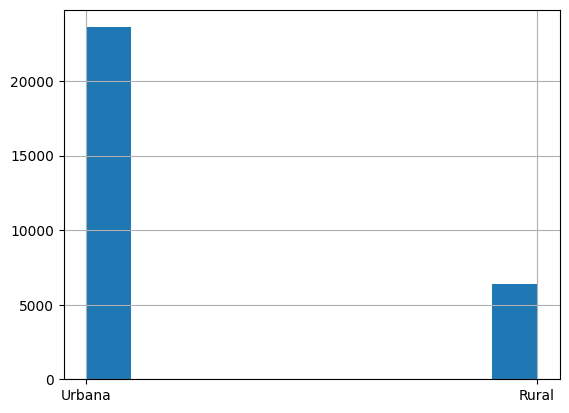

In [ ]:
dfsc.Zona.hist()

<Axes: >

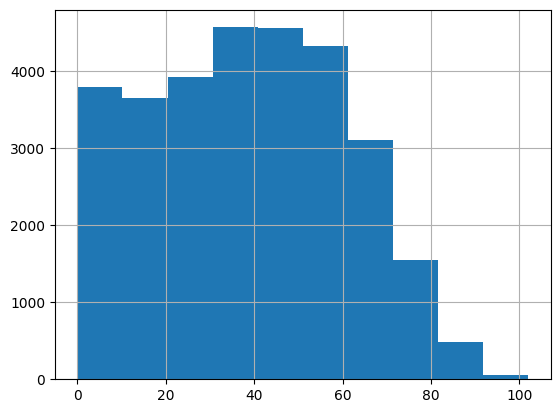

In [ ]:
dfsc.Idade.hist()

In [ ]:
dfsc.Idade.value_counts(bins=10).sort_index()

,count
"(-0.103, 10.2]",3800
"(10.2, 20.4]",3646
"(20.4, 30.6]",3926
"(30.6, 40.8]",4570
"(40.8, 51.0]",4962
"(51.0, 61.2]",3931
"(61.2, 71.4]",3104
"(71.4, 81.6]",1551
"(81.6, 91.8]",478
"(91.8, 102.0]",62


In [ ]:
dfsc.query('Idade > 100').Idade

,Idade
4473,101
18924,102
19557,101


In [ ]:
## gravar amostra para continuar analises sem precisar carregar o dataframe inteiro
dfsc.to_csv('/content/drive/MyDrive/colab-files/IBGE-PNAD/pnadsc.csv', index=False)

NameError: name 'dfsc' is not defined

###Análise Dados de Cadasrtro

<Axes: xlabel='Zona'>

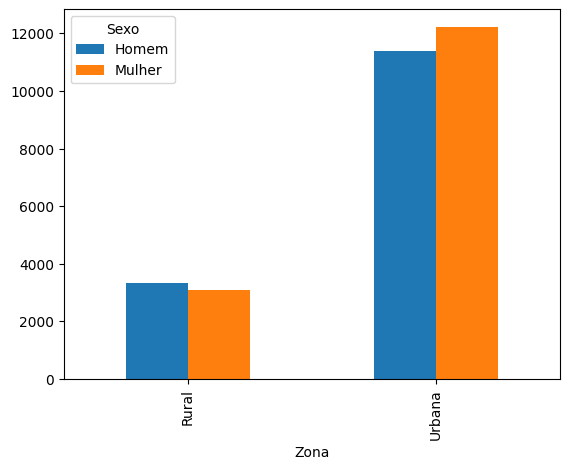

In [ ]:
# Qtde pessoas por Zona
dfsc.groupby(['Zona','Sexo']).size().unstack().plot(kind='bar')

<Axes: xlabel='Zona'>

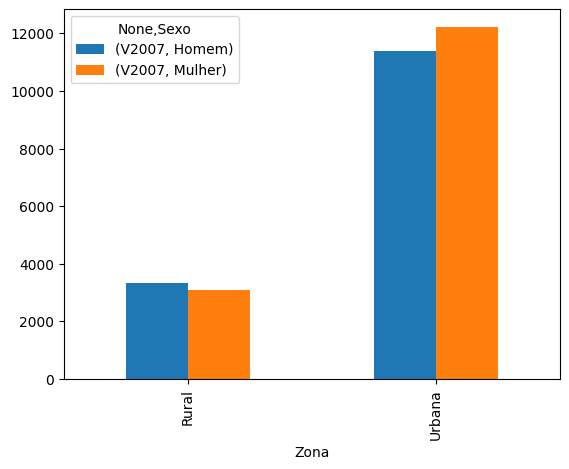

In [ ]:
dfsc[['Zona','Sexo','V2007']].pivot_table(index='Zona', columns='Sexo', aggfunc='count').plot(kind='bar')

<Axes: xlabel='Zona'>

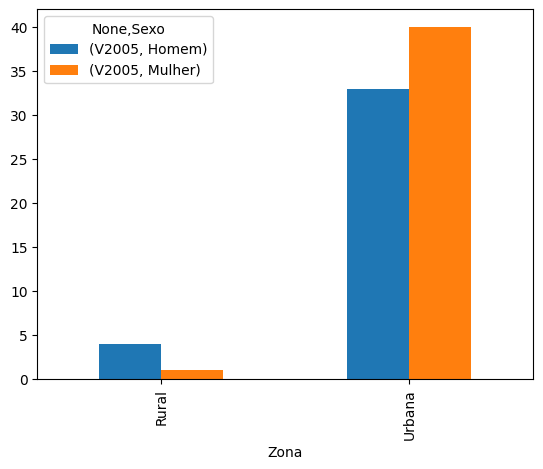

In [ ]:
# familias heteronormativas x homonormativas
dfsc[['Zona','Sexo','V2005']][dfsc['V2005']==3].pivot_table(index='Zona', columns='Sexo', aggfunc='count').plot(kind='bar')

In [ ]:
dfsc[['Zona','Sexo','V2005']][dfsc['V2005']==3].value_counts( )

Zona    Sexo    V2005
Urbana  Mulher  3        40
        Homem   3        33
Rural   Homem   3         4
        Mulher  3         1
Name: count, dtype: int64

<Axes: xlabel='Sexo'>

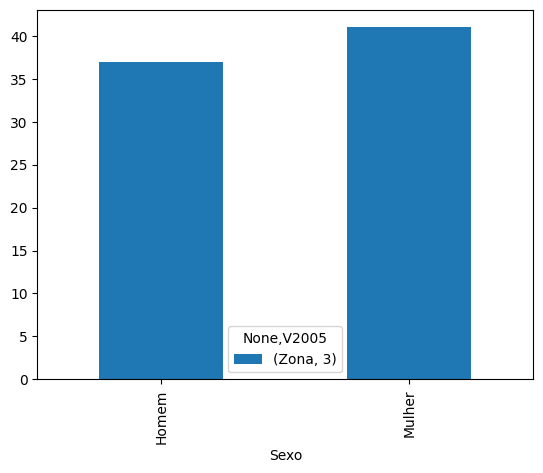

In [ ]:
dfsc.loc[dfsc['V2005'].isin([3]), ['Zona','Sexo','V2005']].pivot_table(index='Sexo', columns='V2005', aggfunc='count').plot(kind='bar')


<Axes: ylabel='count'>

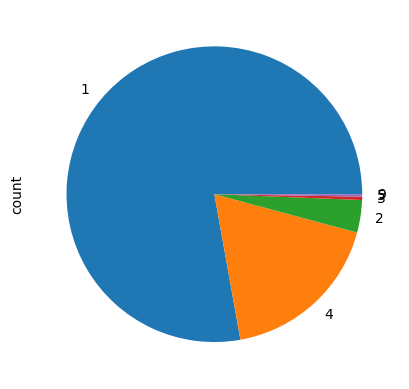

In [ ]:
# Cor/Raça
dfsc['V2010'].value_counts().plot(kind='pie')

In [ ]:
##Posicao das Pessoas Pretas nos domicilios
dfsc[['Domicilio','V2001','V2005']][dfsc['V2010']==2].value_counts()

Domicilio      V2001  V2005
4201681621112  6      10       4
420055686811   8      5        4
420094622512   4      12       3
420175454911   5      5        3
4201746311311  4      5        3
                              ..
420105712811   3      2        1
420105712911   4      1        1
                      4        1
420106264411   2      2        1
420104546612   1      1        1
Name: count, Length: 979, dtype: int64

In [ ]:
#estrutura de um domicilio, considerando raça
dfsc[['V2001','V2005','V2010']][dfsc['Domicilio']==4201681621112]

,V2001,V2005,V2010
393541,6,1,2
393542,6,2,2
393543,6,10,2
393544,6,10,2
393545,6,10,2
393546,6,10,2


<Axes: ylabel='count'>

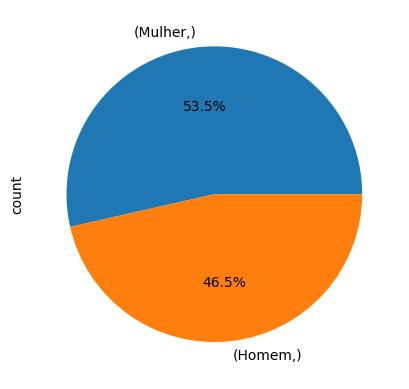

In [ ]:
#Relacao Homem x Mulher responsável pelo domicilio v2007 = 1 -> homem, 2-> mulher, onde só tem uma pessoa na casa
dfsc[['Sexo']][dfsc['V2001']==1].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Sexo'>

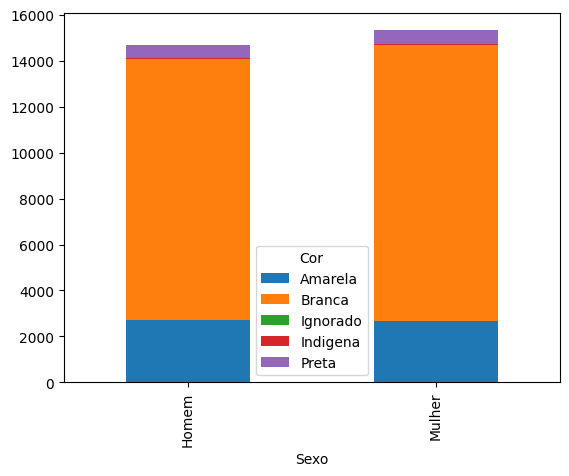

In [ ]:
#Relacao Homem x Mulher, considerando raça, responsável pelo domicilio onde só tem uma pessoa na casa
dfsc[['Sexo','Cor']].value_counts().unstack().plot(kind='bar',stacked=True)

In [ ]:
dtnasc['nascimento'] = pd.to_datetime(dtnasc['nascimento'], format='%d/%m', errors='coerce')

In [ ]:
dtnasc['nascimento'].value_counts(dropna=False)

,count
nascimento,
NaT,3939
1900-09-09,119
1900-05-05,114
1900-03-03,108
1900-10-10,106
...,...
1900-10-26,51
1900-07-31,51
1900-11-02,49


<Axes: xlabel='Zona,Sexo'>

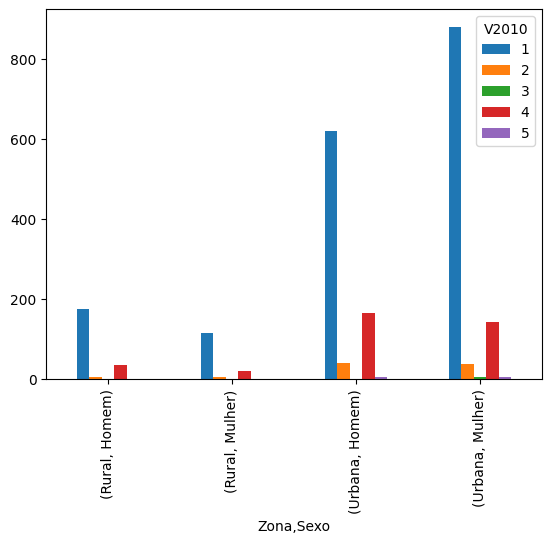

In [ ]:
dfsc[['Zona','Sexo','V2010']][dfsc['V2001']==1].value_counts().unstack().plot(kind='bar')

<Axes: title={'center': 'Domicilios por Sexo'}, xlabel='Zona'>

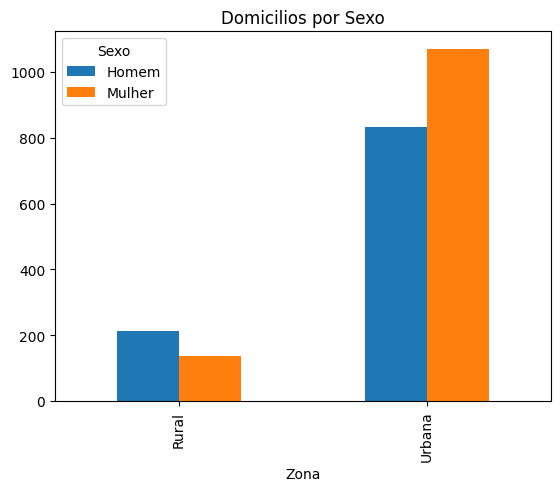

In [ ]:
dfsc[dfsc['V2001']==1].pivot_table(index='Zona', columns='Sexo', values='V2005', aggfunc='count').plot(kind='bar', title="Domicilios por Sexo")

###Estado - Gráficos

<Axes: title={'center': 'Qtde de Pessoas por Domicilio'}, xlabel='V2001'>

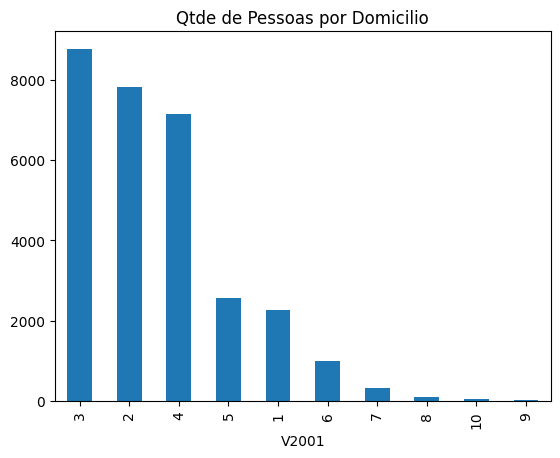

In [ ]:
dfsc['V2001'].value_counts().plot(kind='bar', title = "Qtde de Pessoas por Domicilio")

In [ ]:
# relacao homem mulher responsavel por familia
dfsc['V2007'][ (dfsc['V2001']>1) & (dfsc['V2005']==1) ].value_counts()

,count
V2007,
1,4848
2,4508


<Axes: title={'center': 'Relacao Homens x Mulheres'}, ylabel='count'>

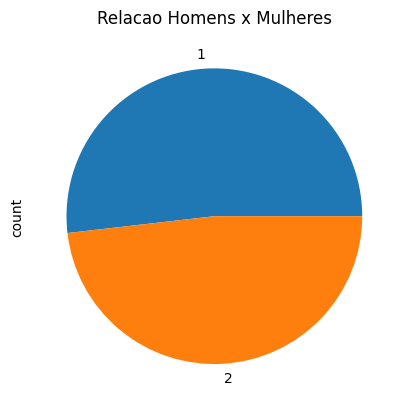

In [ ]:
dfsc['V2007'][ (dfsc['V2001']>1) & (dfsc['V2005']==1) ].value_counts().plot(kind='pie', title="Relacao Homens x Mulheres", y='Qtde')

<Axes: xlabel='Sexo'>

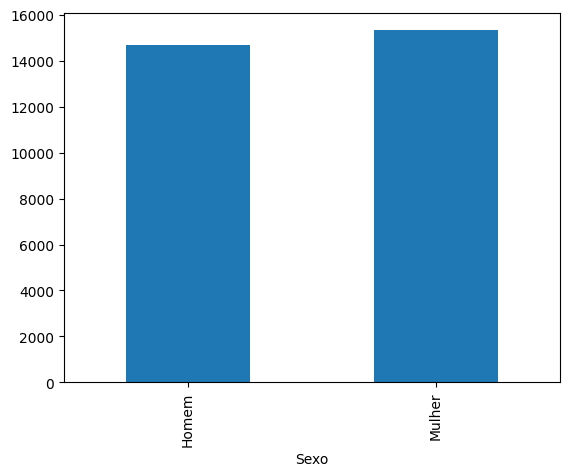

In [ ]:
dfsc.groupby('Sexo').size().plot(kind='bar')

<Axes: ylabel='UF,V2007'>

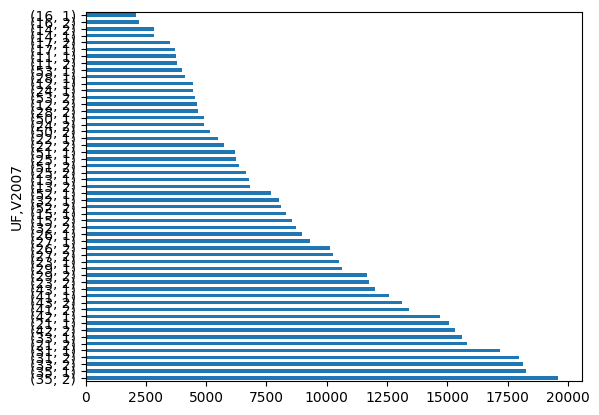

In [ ]:
df[['UF','V2007']].sort_values(by=['UF','V2007']).value_counts().plot(kind='barh')

In [ ]:
dfsc['V1023'].value_counts()

,count
V1023,
4,26105
1,2192
2,1733


<Axes: xlabel='V1023'>

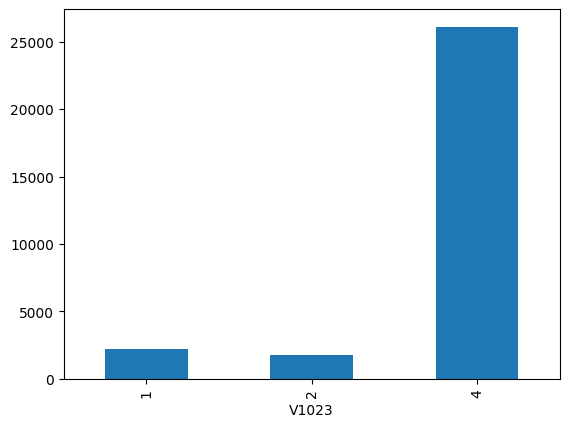

In [ ]:
dfsc.groupby('V1023').size().plot(kind='bar')

In [ ]:
dfsc[['Zona','V3001']][dfsc['V2005']== 1].value_counts()

,,count
Zona,V3001,
Urbana,1.0,9085
Rural,1.0,2322
Urbana,2.0,140
Rural,2.0,65


In [ ]:
dfsc[dfsc['V2005']==1 ].groupby(['Zona', 'V3001']).size().transform(lambda x: x/x.count())

Zona    V3001
Rural   1.0       580.50
        2.0        16.25
Urbana  1.0      2271.25
        2.0        35.00
dtype: float64

In [ ]:
dfsc.groupby(['Zona', 'V3001', 'V2005']).filter(
    lambda x: (x['V2005'] == 1).any()
)

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028196,V1028197,V1028198,V1028199,V1028200,Domicilio,Pessoa,Zona,Sexo,Cor
370220,2025,1,42,NaN,NaN,420000175,4254011,1,12,3,...,1208.005050,308.962731,0.000000,300.344445,0.000000,420000175112,4200001751121,Urbana,Mulher,Branca
370223,2025,1,42,NaN,NaN,420000175,4254011,2,12,3,...,2140.805608,534.885372,0.000000,505.489031,0.000000,420000175212,4200001752121,Urbana,Homem,Branca
370224,2025,1,42,NaN,NaN,420000175,4254011,3,12,3,...,1327.305006,351.945194,0.000000,355.676985,0.000000,420000175312,4200001753121,Urbana,Homem,Branca
370225,2025,1,42,NaN,NaN,420000175,4254011,4,12,3,...,1129.950838,275.956272,0.000000,267.631974,0.000000,420000175412,4200001754121,Urbana,Mulher,Branca
370227,2025,1,42,NaN,NaN,420000175,4254011,5,12,3,...,1034.570676,261.907643,0.000000,250.378580,0.000000,420000175512,4200001755121,Urbana,Mulher,Branca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400238,2025,1,42,NaN,NaN,420215054,4251012,9,12,1,...,344.431759,671.076069,644.822406,0.000000,342.647196,420215054912,4202150549121,Urbana,Homem,Branca
400242,2025,1,42,NaN,NaN,420215054,4251012,10,12,1,...,204.731645,406.211950,405.103209,0.000000,202.984169,4202150541012,42021505410121,Urbana,Mulher,Branca
400243,2025,1,42,NaN,NaN,420215054,4251012,11,12,1,...,330.183557,672.940427,642.220091,0.000000,335.528061,4202150541112,42021505411121,Urbana,Homem,Branca
400247,2025,1,42,NaN,NaN,420215054,4251012,12,12,1,...,226.667336,484.838685,492.357619,0.000000,246.895763,4202150541212,42021505412121,Urbana,Homem,Branca


In [ ]:
dfsc.groupby(['Zona','V3001']).size().transform(lambda x: x/x.count()/100)

Zona    V3001
Rural   1.0      14.5950
        2.0       0.6025
Urbana  1.0      54.2150
        2.0       1.7750
dtype: float64

In [ ]:
dfsc['Domicilio'][dfsc[

,Domicilio
9875,4200574121111
19273,420116425612
22463,420130997711


###Estado - Análise Escolaridade

Regra Escolaridade
VD3004 – Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade)
Sistema de 9 anos do ensino fundamental

Campos necessários:
V3002 -Frequenta escola (1-Sim, 2-Não)
V3008 - Anteriormente frequentou escola (1-Sim, 2-Não)

Regras  partir de janeiro de 2018

In [ ]:
def escolaridade(row):
  V3002  = row.get('V3002')
  V3003A = row.get('V3003A')
  V3005A = row.get('V3005A')
  V3006  = row.get('V3006')
  V3006A = row.get('V3006A')
  V3007 = row.get('V3007')
  V3008  = row.get('V3008')
  V3009A = row.get('V3009A')
  V3010  = row.get('V3010')
  V3011A = row.get('V3011A')
  V3012  = row.get('V3012')
  V3013  = row.get('V3013')
  V3013A = row.get('V3013A')
  V3013B = row.get('V3013B')
  V3014  = row.get('V3014')

  # -------------------------
  # 1 - Sem instrução
  # -------------------------
  if (
      (V3002 == 2 and V3008 == 2)
        or (V3003A is not None and 1 <= V3003A <= 3)
        or (V3003A == 4 and V3006 == 1)
        or (V3003A == 4 and V3006 == 13 and V3006A == 1)
        or (V3009A is not None and 1 <= V3009A <= 2)
        or (V3009A is not None and 3 <= V3009A <= 4 and V3014 == 2)
        or (V3009A == 7 and V3010 == 2 and V3012 == 2)
        or (
            V3009A == 7 and V3010 == 2 and V3012 == 3
            and V3013A == 1 and V3013B == 2
        )
        ):
    return '1- Sem Instrução'

  # ------------------------------------
  # 2 - Fundamental incompleto
  # ------------------------------------
  if (
        (V3003A == 4 and V3006 is not None and 2 <= V3006 <= 9)
        or (V3003A == 4 and V3006 == 13 and V3006A == 2)
        or (
            V3003A == 5 and
            (V3006 is not None and (1 <= V3006 <= 8 or V3006 == 13))
        )
        or (V3009A is not None and 3 <= V3009A <= 4 and V3014 == 1)
        or (V3009A == 5)
        or ((V3009A in [6, 8]) and V3012 == 2)
        or (V3009A == 6 and V3012 == 3 and V3014 == 2)
        or (V3009A == 6 and V3013 is not None and 1 <= V3013 <= 3)
        or (V3009A == 6 and V3013 == 4 and V3014 == 2)
        or (V3009A == 7 and V3010 == 1 and V3012 == 2)
        or (
            V3009A == 7 and V3010 == 1 and V3012 == 3
            and V3013A == 1
        )
        or (
            V3009A is not None and 7 <= V3009A <= 8
            and V3012 == 3 and V3013A == 2 and V3014 == 2
        )
        or (V3009A == 7 and V3010 == 1 and V3013 is not None and 1 <= V3013 <= 7)
        or (
            V3009A == 7 and V3010 == 2 and V3012 == 3
            and V3013A == 1 and V3013B == 1
        )
        or (V3009A == 7 and V3010 == 2 and V3013 is not None and 1 <= V3013 <= 8)
        or (V3009A == 8 and V3012 == 3 and V3013A == 1)
        or (V3009A == 8 and V3013 is not None and 1 <= V3013 <= 7)
        ):
    return '2- Fundamental Incompleto'

  # -------------------------
  # 3 - Fundamental completo ou equivalente
  # -------------------------
  if (
        (V3003A is not None and 6 <= V3003A <= 7 and (V3006 == 1 or V3006 == 13))
        or (V3009A == 6 and V3012 == 3 and V3014 == 1 )
        or (V3009A == 6 and V3013 == 4 and V3014 == 1 )
        or (V3009A == 6 and V3013 == 5 )
        or (V3009A is not None and 7 <= V3009A <= 8 and V3012 == 3 and V3013A == 2 and V3014 == 1)
        or (V3009A == 7 and  V3010 == 1 and V3013 == 8)
        or (V3009A == 7 and  V3010 == 2 and V3013 == 9)
        or (V3009A == 8 and V3013 == 8)
        or (V3009A is not None and 9 <= V3009A <= 11 and V3012 == 2)
        or (V3009A is not None and 9 <= V3009A <= 11 and V3012 == 3 and V3014 == 2)
        ):
    return '3- Fundamental Completo'

  # -------------------------
  # 4 - Médio incompleto ou equivalente
  # -------------------------
  if (
        (V3003A == 6 and V3006 is not None and  2 <= V3006 <= 4 )
        or (V3003A == 7 and V3006 is not None and 2 <= V3006 <= 3 )
        or (V3009A is not None and 9 <= V3009A <= 11 and V3013 in [1,2])
        or (V3009A is not None and 9 <= V3009A <= 10 and V3013 == 3 and V3014 == 2)
        ):
    return '4- Médio Incompleto'

  # -------------------------
  # 5 - Médio completo
  # ---------------------
  if (
      (V3003A == 8 and V3005A == 1 and V3006 is not None and 1 <= V3006 <= 2 and V3007 == 2 )
      or (V3003A == 8 and V3005A is not None and 2 <= V3005A <= 3 and V3006 == 1 and V3007 == 2)
      or (V3009A is not None and 9 <= V3009A <= 11 and V3012 == 3 and V3014 == 1)
      or (V3009A is not None and 9 <= V3009A <= 10 and V3013 == 3 and V3014 == 1)
      or (V3009A is not None and 9 <= V3009A <= 10 and V3013 == 4)
      or (V3009A == 11 and V3013 == 3)
      or (V3009A == 12 and V3011A == 1 and V3013 == 1)
      or (V3009A == 12 and V3012 == 2)
      ):
    return '5- Médio Completo'

  # -------------------------
  # 6 - Superior incompleto
  # ---------------------
  if (
        (V3003A == 8 and V3005A == 1 and V3006 is not None and  3 <= V3006 <= 12 and V3007 == 2 )
        or (V3003A == 8 and V3005A is not None and 2 <= V3005A <= 3 and V3006 is not None and 2 <= V3006 <= 6 and V3007 == 2 )
        or (V3009A == 12 and V3011A == 1 and V3013 is not None and 2 <= V3013 <= 3)
        or (V3009A == 12 and V3011A == 1 and V3013 is not None and 4 <= V3013 <= 11 and V3014 == 2)
        or (V3009A == 12 and  V3011A is not None and 2 <= V3011A <= 3 and V3013 == 1)
        or (V3009A == 12 and V3011A is not None and 2 <= V3011A <= 3 and
            V3013 is not None and 2 <= V3013 <= 5 and V3014 == 2)
        ):
    return '6- Superior Incompleto'

  # -------------------------
  # 7 - Superior completo
  # ---------------------

  if (
        (V3003A == 8 and V3007 == 1)
        or (V3003A is not None and 9 <= V3003A <= 11)
        or (V3009A == 12 and V3011A == 1 and V3013 is not None and 4 <= V3013 <= 11 and V3014 == 1)
        or (V3009A == 12 and V3011A == 1 and V3013 == 12)
        or (V3009A == 12 and V3011A is not None and  2 <= V3011A <= 3 and V3013 is not None and 2 <= V3013 <= 5 and V3014 == 1)
        or (V3009A == 12 and V3011A is not None and  2 <= V3011A <= 3 and V3013 == 6)
        or (V3009A is not None and 13 <= V3009A <= 15)
    ):
      return '7- Superior Completo'

  # Caso não se encaixe
  return None


### Criar coluna especifica
dfsc['Escolaridade'] = dfsc.apply(escolaridade, axis=1)

In [ ]:
dfsc['Escolaridade'].value_counts()

,count
Escolaridade,
2- Fundamental Incompleto,8946
5- Médio Completo,7588
7- Superior Completo,4870
3- Fundamental Completo,2745
4- Médio Incompleto,1671
1- Sem Instrução,1410
6- Superior Incompleto,1245


<Axes: title={'center': 'Adultos não alfabetizados por sexo'}>

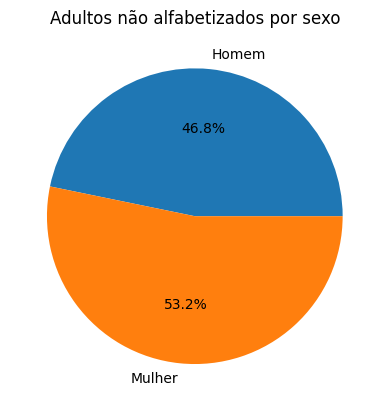

In [ ]:
# Adultos não alfabetizadas por sexo.

dfsc.loc[ (dfsc['Idade'] > 14) & (dfsc['V3001']==2) ].groupby(['Sexo']).size().plot(kind='pie', title="Adultos não alfabetizados por sexo", autopct='%1.1f%%')


<Axes: title={'center': 'Relação Alfabetização por sexo'}>

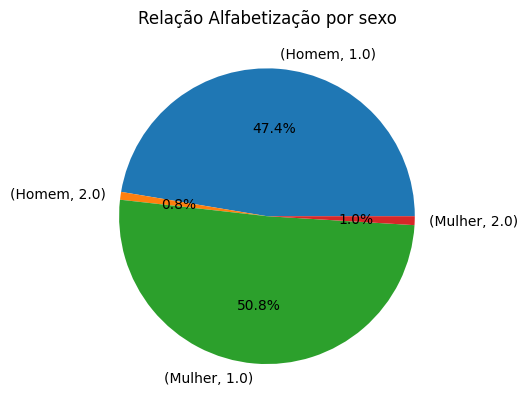

In [ ]:
#Relação Adultos Alfabetizados e não alfabetizados
#dfsc.loc[ (dfsc['Idade'] > 14)].groupby(['Sexo','V3001']).size().plot(kind='pie', title="Adultos não alfabetizados por sexo", autopct='%1.1f%%')
dfsc.loc[ (dfsc['Idade'] > 14)].groupby(['Sexo','V3001']).size().plot(kind='pie', title="Relação Alfabetização por sexo", autopct='%1.1f%%')

<Axes: title={'center': 'Relação Alfabetização por sexo'}, xlabel='Sexo'>

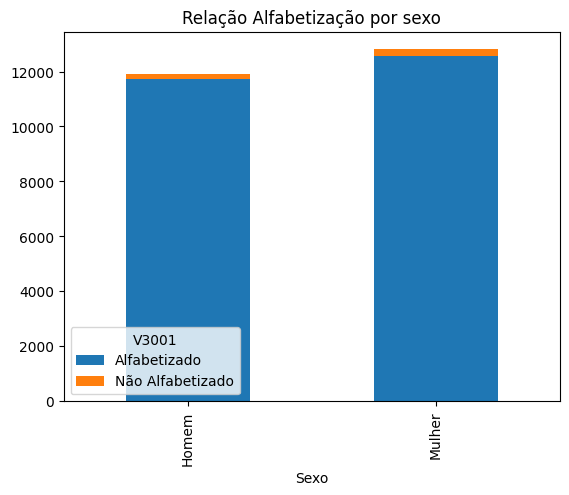

In [ ]:
#dfsc.loc[ (dfsc['Idade'] > 14)].groupby(['Sexo','V3001']).size().plot(kind='bar', title="Relação Alfabetização por sexo")
#dfsc.loc[ (dfsc['Idade'] > 14)].assign( V3001=lambda x: x['V3001'].map({1: 'Alfabetizado', 2:'Não Alfabetizado'}) ).groupby(['Sexo','V3001']).size().plot(kind='bar', title="Relação Alfabetização por sexo")
dfsc.loc[ (dfsc['Idade'] > 14)].assign( V3001=lambda x: x['V3001'].map({1: 'Alfabetizado', 2:'Não Alfabetizado'}) ).groupby(['Sexo','V3001']).size().unstack().plot(kind='bar', title="Relação Alfabetização por sexo", stacked=True)
#

<Axes: title={'center': 'Relação Escolas Públicas x Privadas por Zona'}, xlabel='Zona'>

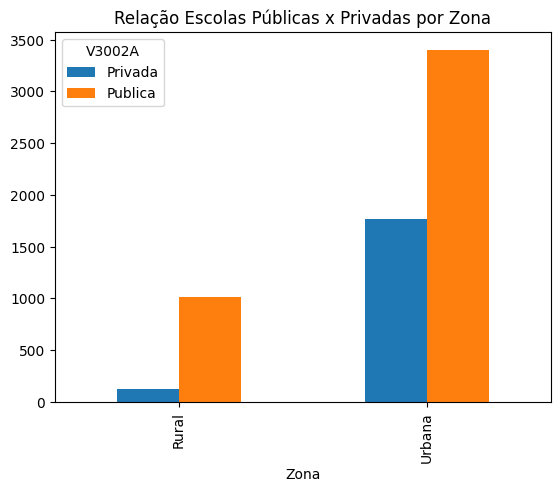

In [ ]:

# Relacao Escolas Publicas x Privadas por Zona
# Dados estão tratados, podemos considerar apenas Rede Publica xPrivada, sem considerar o flag da escola
dfsc[['Zona','V3002A']].assign( V3002A = lambda x: x['V3002A'].map({ 1:'Privada', 2:'Publica'})).groupby(['Zona','V3002A']).size().unstack().plot(kind='bar', title="Relação Escolas Públicas x Privadas por Zona")
#

<Axes: xlabel='Escolaridade'>

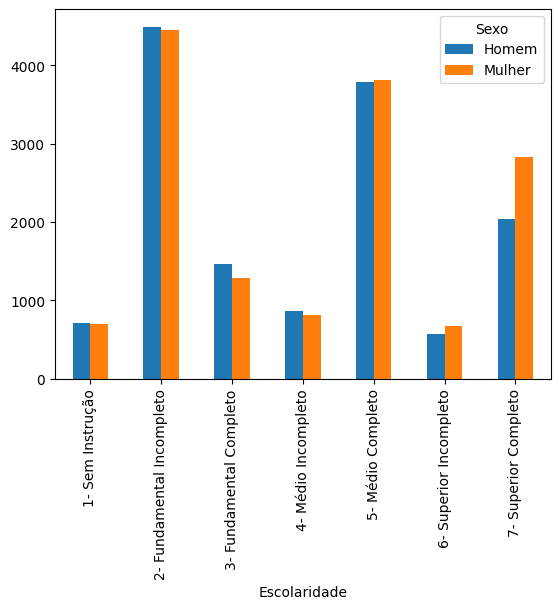

In [ ]:
# Escolaridade x Sexo
dfsc[['Escolaridade','Sexo']].value_counts().unstack().plot(kind='bar')

<Axes: ylabel='count'>

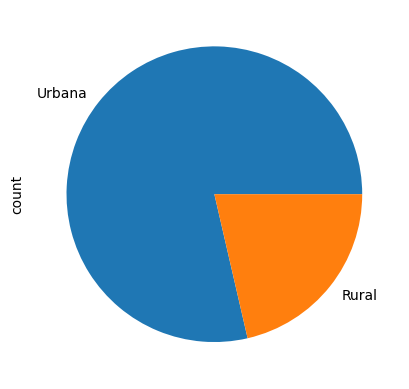

In [ ]:
dfsc['Zona'].value_counts().plot(kind='pie')

In [ ]:
dfsc.loc[ (dfsc['V2005'].isin([18,19]))]['Domicilio']

,Domicilio
9875,4200574121111
19273,420116425612
22463,420130997711


<Axes: xlabel='Signo'>

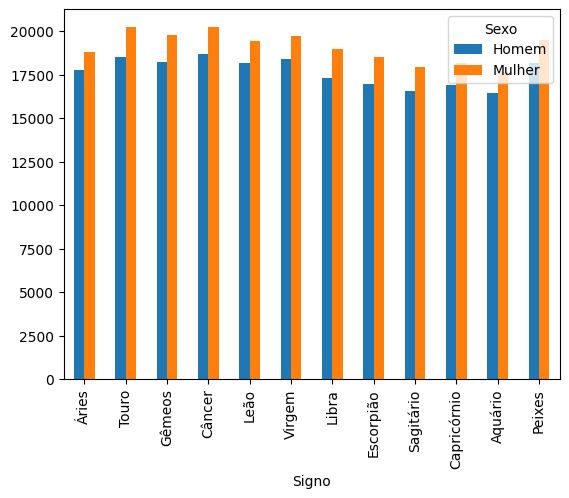

In [ ]:
df[['Signo','Sexo']].value_counts().unstack().plot(kind='bar')

# Transformação dos dados
Tratamento dos dados para otimização do processamento - categorização
Aplicação de regras conforme a documentação para definição de atributos especificos para os dashboards.
Exclusão de colunas não relevantes a esta análise.



##Análises Preliminares de Cadastro

<Axes: ylabel='count'>

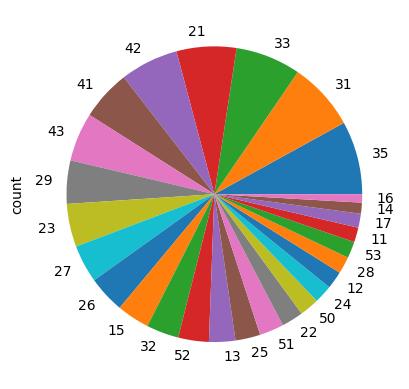

In [4]:
df['UF'].value_counts().plot(kind='pie')

## Cadastro Básico

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472367 entries, 0 to 472366
Columns: 420 entries, Ano to V1028200
dtypes: float64(393), int64(27)
memory usage: 1.5 GB


In [6]:
# chave Pessoa e Domicilio -> Série Temporal
df['Domicilio'] = df['UPA'].astype(str) + df['V1008'].astype(str) + df['V1014'].astype(str)
df['Pessoa'] = df['Domicilio'] + df['V2003'].astype(str)
df['Domicilio'] = df['Domicilio'].astype(int)
df['Pessoa'] = df['Pessoa'].astype(int)

In [7]:
col_original = ['V1022','V2007','V2010']
col_renomeada = ['Zona','Sexo','Cor']

df[col_original] = df[col_original].astype('category')

colunas = dict(zip(col_original, col_renomeada))
df.rename(columns=colunas, inplace=True)

df['Zona'] = df['Zona'].cat.rename_categories({1: 'Urbana', 2: 'Rural'})
df['Sexo'] = df['Sexo'].cat.rename_categories({1: 'Homem', 2: 'Mulher'})
df['Cor'] = df['Cor'].cat.rename_categories({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

df['UF'] = df['UF'].astype('category')
df['UF'] = df['UF'].cat.rename_categories({11:'Rondônia',
12: 'Acre',
13: 'Amazonas',
14: 'Roraima',
15: 'Pará',
16: 'Amapá',
17: 'Tocantins',
21: 'Maranhão',
22: 'Piauí',
23: 'Ceará',
24: 'Rio Grande do Norte',
25: 'Paraíba',
26: 'Pernambuco',
27: 'Alagoas',
28: 'Sergipe',
29: 'Bahia',
31: 'Minas Gerais',
32: 'Espírito Santo',
33: 'Rio de Janeiro',
35: 'São Paulo',
41: 'Paraná',
42: 'Santa Catarina',
43: 'Rio Grande do Sul',
50: 'Mato Grosso do Sul',
51: 'Mato Grosso',
52: 'Goiás',
53: 'Distrito Federal'})







In [8]:
df['Zona'] = df['Zona'].cat.rename_categories({1: 'Urbana', 2: 'Rural'})
df['Sexo'] = df['Sexo'].cat.rename_categories({1: 'Homem', 2: 'Mulher'})
df['Cor'] = df['Cor'].cat.rename_categories({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

<Axes: >

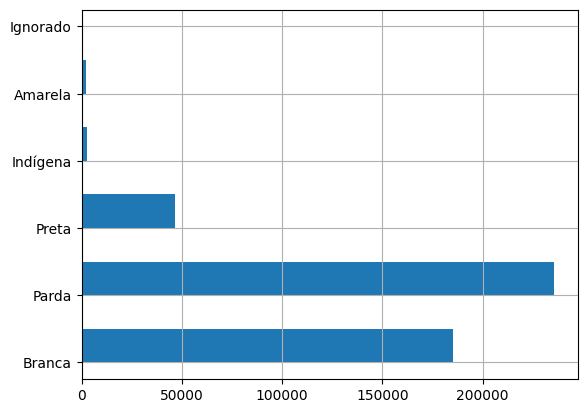

In [9]:
df.Cor.hist(orientation = 'horizontal')

<Axes: ylabel='count'>

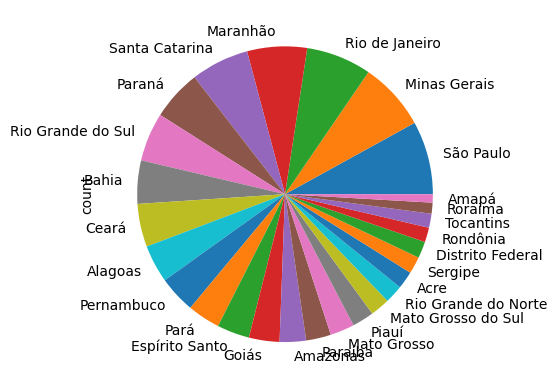

In [10]:
df.UF.value_counts().plot(kind='pie')

In [11]:
df.Capital = df.Capital.astype('category')
df.Capital = df.Capital.cat.rename_categories({11:'Porto Velho (RO)',
12: 'Rio Branco (AC)',
13: 'Manaus (AM)',
14: 'Boa Vista (RR)',
15: 'Belém (PA)',
16: 'Macapá (AP)',
17: 'Palmas (TO)',
21: 'São Luís (MA)',
22: 'Teresina (PI)',
23: 'Fortaleza (CE)',
24: 'Natal (RN)',
25: 'João Pessoa (PB)',
26: 'Recife (PE)',
27: 'Maceió (AL)',
28: 'Aracaju (SE)',
29: 'Salvador (BA)',
31: 'Belo Horizonte (MG)',
32: 'Vitória (ES)',
33: 'Rio de Janeiro (RJ)',
35: 'São Paulo (SP)',
41: 'Curitiba (PR)',
42: 'Florianópolis (SC)',
43: 'Porto Alegre (RS)',
50: 'Campo Grande (MS)',
51: 'Cuiabá (MT)',
52: 'Goiânia (GO)',
53: 'Brasília (DF)'})


<Axes: >

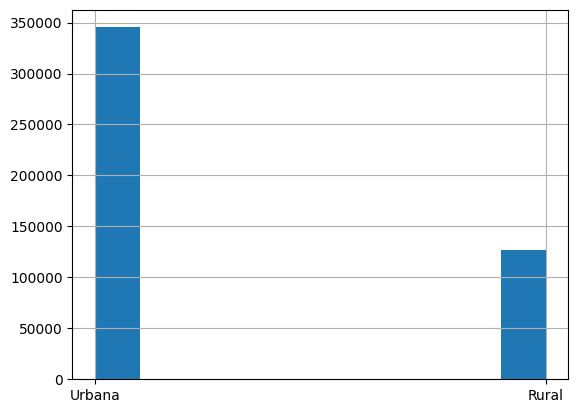

In [12]:
df.Zona.hist()


In [13]:
df.describe(include='category')

,UF,Capital,Zona,Sexo,Cor
count,472367,110094,472367,472367,472367
unique,27,27,2,2,6
top,São Paulo,Rio de Janeiro (RJ),Urbana,Mulher,Parda
freq,37838,11544,345388,244508,235611


In [14]:
for coluna in df.select_dtypes(include='category').columns:
  print(coluna, df[coluna].unique())
  print (f'Coluna {coluna} tem {df[coluna].nunique()} valores únicos')

UF ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', ..., 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
Length: 27
Categories (27, object): ['Rondônia', 'Acre', 'Amazonas', 'Roraima', ..., 'Mato Grosso do Sul',
                          'Mato Grosso', 'Goiás', 'Distrito Federal']
Coluna UF tem 27 valores únicos
Capital ['Porto Velho (RO)', NaN, 'Rio Branco (AC)', 'Manaus (AM)', 'Boa Vista (RR)', ..., 'Porto Alegre (RS)', 'Campo Grande (MS)', 'Cuiabá (MT)', 'Goiânia (GO)', 'Brasília (DF)']
Length: 28
Categories (27, object): ['Porto Velho (RO)', 'Rio Branco (AC)', 'Manaus (AM)', 'Boa Vista (RR)', ...,
                          'Campo Grande (MS)', 'Cuiabá (MT)', 'Goiânia (GO)', 'Brasília (DF)']
Coluna Capital tem 27 valores únicos
Zona ['Urbana', 'Rural']
Categories (2, object): ['Urbana', 'Rural']
Coluna Zona tem 2 valores únicos
Sexo ['Mulher', 'Homem']
Categories (2, object): ['Homem', 'Mulher']
Coluna Sexo tem 2 valores únicos
Cor ['Branca'

In [15]:
## Faixas Etárias
bins = [0, 14, 19, 60, 100, float('inf')]
labels = ['Criança', 'Jovem', 'Adulto', 'Idoso', 'Centenário']
df['Faixa_Etaria'] = pd.cut(x=df['V2009'], bins=bins, labels=labels, include_lowest=True, ordered= True)

In [16]:
df.shape[0]

472367

In [17]:
df.Faixa_Etaria.shape[0]

472367

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:7129: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


<Axes: >

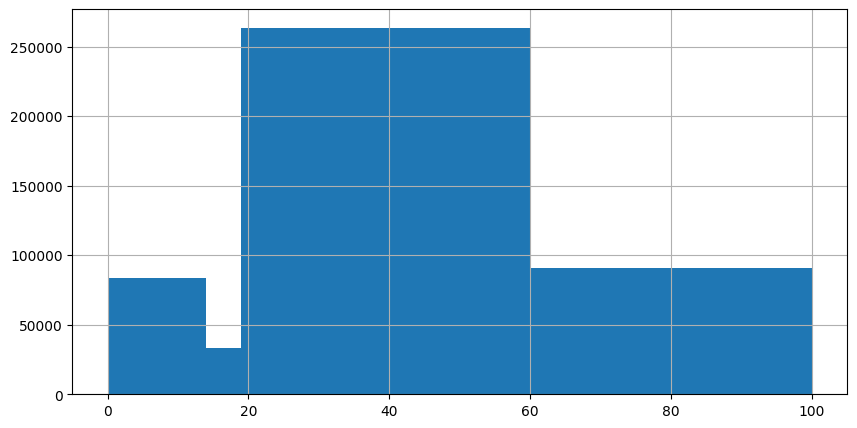

In [18]:
bins = [0, 14, 19, 60, 100, float('inf')]
df['V2009'].hist(bins=bins, figsize=(10,5))

<Axes: xlabel='Faixa_Etaria'>

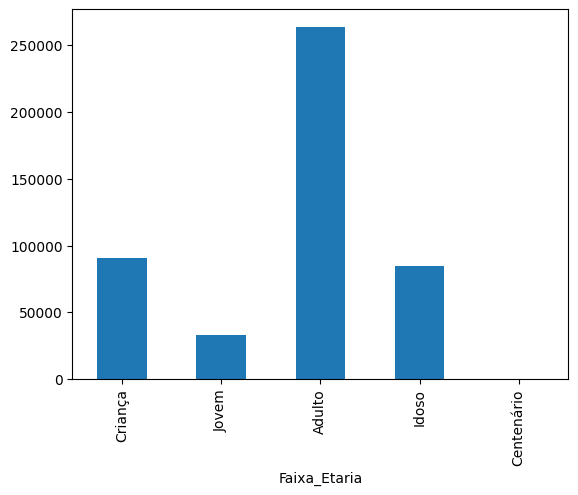

In [19]:
df.Faixa_Etaria.value_counts().sort_index().plot(kind='bar')

## Escolaridade

Relevancia para análise:
Grau de Escolaridade de quem não frequenta mais a escola
Análise Criancas em idade escolar.

<Axes: >

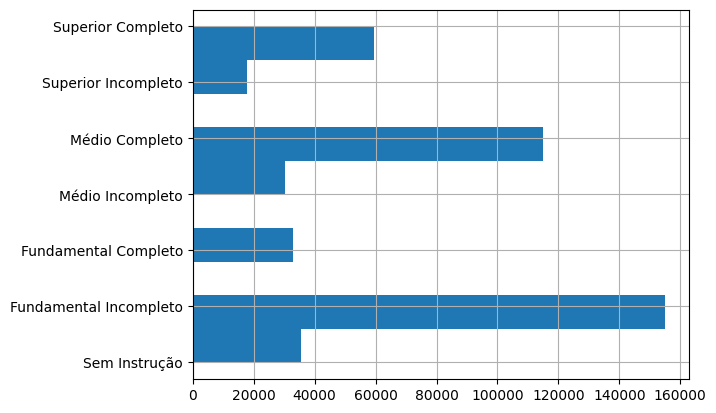

In [20]:
def escolaridade(row):
  V3002  = row.get('V3002')
  V3003A = row.get('V3003A')
  V3005A = row.get('V3005A')
  V3006  = row.get('V3006')
  V3006A = row.get('V3006A')
  V3007 = row.get('V3007')
  V3008  = row.get('V3008')
  V3009A = row.get('V3009A')
  V3010  = row.get('V3010')
  V3011A = row.get('V3011A')
  V3012  = row.get('V3012')
  V3013  = row.get('V3013')
  V3013A = row.get('V3013A')
  V3013B = row.get('V3013B')
  V3014  = row.get('V3014')

  # -------------------------
  # 1 - Sem instrução
  # -------------------------
  if (
      (V3002 == 2 and V3008 == 2)
        or (V3003A is not None and 1 <= V3003A <= 3)
        or (V3003A == 4 and V3006 == 1)
        or (V3003A == 4 and V3006 == 13 and V3006A == 1)
        or (V3009A is not None and 1 <= V3009A <= 2)
        or (V3009A is not None and 3 <= V3009A <= 4 and V3014 == 2)
        or (V3009A == 7 and V3010 == 2 and V3012 == 2)
        or (
            V3009A == 7 and V3010 == 2 and V3012 == 3
            and V3013A == 1 and V3013B == 2
        )
        ):
    return 'Sem Instrução'

  # ------------------------------------
  # 2 - Fundamental incompleto
  # ------------------------------------
  if (
        (V3003A == 4 and V3006 is not None and 2 <= V3006 <= 9)
        or (V3003A == 4 and V3006 == 13 and V3006A == 2)
        or (
            V3003A == 5 and
            (V3006 is not None and (1 <= V3006 <= 8 or V3006 == 13))
        )
        or (V3009A is not None and 3 <= V3009A <= 4 and V3014 == 1)
        or (V3009A == 5)
        or ((V3009A in [6, 8]) and V3012 == 2)
        or (V3009A == 6 and V3012 == 3 and V3014 == 2)
        or (V3009A == 6 and V3013 is not None and 1 <= V3013 <= 3)
        or (V3009A == 6 and V3013 == 4 and V3014 == 2)
        or (V3009A == 7 and V3010 == 1 and V3012 == 2)
        or (
            V3009A == 7 and V3010 == 1 and V3012 == 3
            and V3013A == 1
        )
        or (
            V3009A is not None and 7 <= V3009A <= 8
            and V3012 == 3 and V3013A == 2 and V3014 == 2
        )
        or (V3009A == 7 and V3010 == 1 and V3013 is not None and 1 <= V3013 <= 7)
        or (
            V3009A == 7 and V3010 == 2 and V3012 == 3
            and V3013A == 1 and V3013B == 1
        )
        or (V3009A == 7 and V3010 == 2 and V3013 is not None and 1 <= V3013 <= 8)
        or (V3009A == 8 and V3012 == 3 and V3013A == 1)
        or (V3009A == 8 and V3013 is not None and 1 <= V3013 <= 7)
        ):
    return 'Fundamental Incompleto'

  # -------------------------
  # 3 - Fundamental completo ou equivalente
  # -------------------------
  if (
        (V3003A is not None and 6 <= V3003A <= 7 and (V3006 == 1 or V3006 == 13))
        or (V3009A == 6 and V3012 == 3 and V3014 == 1 )
        or (V3009A == 6 and V3013 == 4 and V3014 == 1 )
        or (V3009A == 6 and V3013 == 5 )
        or (V3009A is not None and 7 <= V3009A <= 8 and V3012 == 3 and V3013A == 2 and V3014 == 1)
        or (V3009A == 7 and  V3010 == 1 and V3013 == 8)
        or (V3009A == 7 and  V3010 == 2 and V3013 == 9)
        or (V3009A == 8 and V3013 == 8)
        or (V3009A is not None and 9 <= V3009A <= 11 and V3012 == 2)
        or (V3009A is not None and 9 <= V3009A <= 11 and V3012 == 3 and V3014 == 2)
        ):
    return 'Fundamental Completo'

  # -------------------------
  # 4 - Médio incompleto ou equivalente
  # -------------------------
  if (
        (V3003A == 6 and V3006 is not None and  2 <= V3006 <= 4 )
        or (V3003A == 7 and V3006 is not None and 2 <= V3006 <= 3 )
        or (V3009A is not None and 9 <= V3009A <= 11 and V3013 in [1,2])
        or (V3009A is not None and 9 <= V3009A <= 10 and V3013 == 3 and V3014 == 2)
        ):
    return 'Médio Incompleto'

  # -------------------------
  # 5 - Médio completo
  # ---------------------
  if (
      (V3003A == 8 and V3005A == 1 and V3006 is not None and 1 <= V3006 <= 2 and V3007 == 2 )
      or (V3003A == 8 and V3005A is not None and 2 <= V3005A <= 3 and V3006 == 1 and V3007 == 2)
      or (V3009A is not None and 9 <= V3009A <= 11 and V3012 == 3 and V3014 == 1)
      or (V3009A is not None and 9 <= V3009A <= 10 and V3013 == 3 and V3014 == 1)
      or (V3009A is not None and 9 <= V3009A <= 10 and V3013 == 4)
      or (V3009A == 11 and V3013 == 3)
      or (V3009A == 12 and V3011A == 1 and V3013 == 1)
      or (V3009A == 12 and V3012 == 2)
      ):
    return 'Médio Completo'

  # -------------------------
  # 6 - Superior incompleto
  # ---------------------
  if (
        (V3003A == 8 and V3005A == 1 and V3006 is not None and  3 <= V3006 <= 12 and V3007 == 2 )
        or (V3003A == 8 and V3005A is not None and 2 <= V3005A <= 3 and V3006 is not None and 2 <= V3006 <= 6 and V3007 == 2 )
        or (V3009A == 12 and V3011A == 1 and V3013 is not None and 2 <= V3013 <= 3)
        or (V3009A == 12 and V3011A == 1 and V3013 is not None and 4 <= V3013 <= 11 and V3014 == 2)
        or (V3009A == 12 and  V3011A is not None and 2 <= V3011A <= 3 and V3013 == 1)
        or (V3009A == 12 and V3011A is not None and 2 <= V3011A <= 3 and
            V3013 is not None and 2 <= V3013 <= 5 and V3014 == 2)
        ):
    return 'Superior Incompleto'

  # -------------------------
  # 7 - Superior completo
  # ---------------------

  if (
        (V3003A == 8 and V3007 == 1)
        or (V3003A is not None and 9 <= V3003A <= 11)
        or (V3009A == 12 and V3011A == 1 and V3013 is not None and 4 <= V3013 <= 11 and V3014 == 1)
        or (V3009A == 12 and V3011A == 1 and V3013 == 12)
        or (V3009A == 12 and V3011A is not None and  2 <= V3011A <= 3 and V3013 is not None and 2 <= V3013 <= 5 and V3014 == 1)
        or (V3009A == 12 and V3011A is not None and  2 <= V3011A <= 3 and V3013 == 6)
        or (V3009A is not None and 13 <= V3009A <= 15)
    ):
      return 'Superior Completo'

  # Caso não se encaixe
  return None

df['Escolaridade'] = df.apply(escolaridade, axis=1)
df['Escolaridade'] = df['Escolaridade'].astype('category')

ordem = ['Sem Instrução', 'Fundamental Incompleto', 'Fundamental Completo', 'Médio Incompleto', 'Médio Completo', 'Superior Incompleto', 'Superior Completo']
df['Escolaridade'] = df['Escolaridade'].cat.set_categories(ordem, ordered = True)
df.Escolaridade.sort_values().hist(orientation='horizontal')

In [21]:
# Categorização dados Relevantes para Gráficos
col_original = ['V3001','V3002','V3002A']
col_renomeada = ['Alfabetizado','Frequenta_Escola','Rede_Escola']

df[col_original] = df[col_original].astype('category')

colunas = dict(zip(col_original, col_renomeada))
df.rename(columns=colunas, inplace=True)

df.Alfabetizado = df.Alfabetizado.cat.rename_categories({1: 'Sim' , 2:'Não'})
df.Frequenta_Escola = df.Frequenta_Escola.cat.rename_categories({1: 'Sim' , 2:'Não'})
df.Rede_Escola = df.Rede_Escola.cat.rename_categories({1: 'Rede Privada' , 2:'Rede Pública'})

<Axes: ylabel='count'>

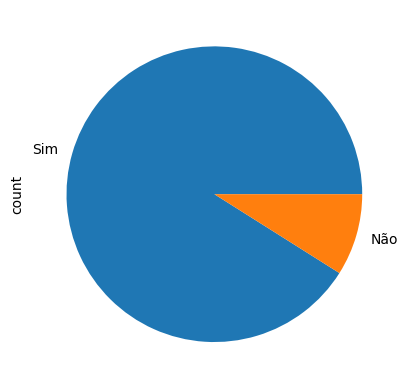

In [22]:
df.Alfabetizado.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

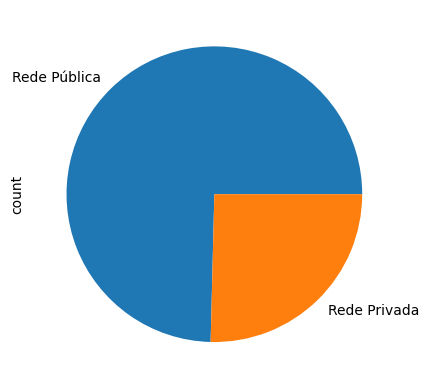

In [23]:
df.Rede_Escola.value_counts().plot(kind='pie')

In [24]:
df.query('Escolaridade == "Sem Instrução" and Alfabetizado =="Sim" and V3006.notna() and (V3006 != 1)')[['UF','Domicilio','Zona','Frequenta_Escola','V3003A','V3006','V3006A','Rede_Escola','V2009']]

,UF,Domicilio,Zona,Frequenta_Escola,V3003A,V3006,V3006A,Rede_Escola,V2009
8551,Acre,120002053312,Urbana,Sim,4.0,13.0,1.0,Rede Pública,16
30127,Amazonas,1301431961312,Rural,Sim,4.0,13.0,1.0,Rede Pública,14
113445,Ceará,2300621051411,Urbana,Sim,4.0,13.0,1.0,Rede Pública,5
189456,Alagoas,2700887641212,Rural,Sim,4.0,13.0,1.0,Rede Pública,65
225708,Minas Gerais,310084638412,Urbana,Sim,4.0,13.0,1.0,Rede Pública,30
274837,Rio de Janeiro,330033666311,Urbana,Sim,4.0,13.0,1.0,Rede Pública,23
317722,São Paulo,350328042912,Urbana,Sim,4.0,13.0,1.0,Rede Pública,30
346702,Paraná,4100230641012,Urbana,Sim,4.0,13.0,1.0,Rede Pública,9
350916,Paraná,410061326612,Urbana,Sim,4.0,13.0,1.0,Rede Pública,38
350917,Paraná,410061326612,Urbana,Sim,4.0,13.0,1.0,Rede Pública,19


In [25]:
df.query('Domicilio == 330007872312').Frequenta_Escola.value_counts()

,count
Frequenta_Escola,
Sim,3
Não,2


## Mercado de Trabalho

In [26]:

#--------
# Pessoas na força de trabalho
V2009 = df['V2009']
V4009 = df['V4009']
V4071 = df['V4071']
V4072A = df['V4072A']
V4077 = df['V4077']
V4073 = df['V4073']
V4074A = df['V4074A']
V4075A = df['V4075A']
V4075A1 = df['V4075A1']

dentro_forca = ( (V2009 >= 14) & ~(V4009.isna())) | (
(V2009 >= 14) & (V4009.isna()) &
(((V4071 == 1) & (V4072A.between(1,8,inclusive='both')) & (V4077 == 1))
 |
((((V4071 == 1) & (V4072A == 9)) | (V4071 == 2)) & (V4073 == 1) & (V4074A == 1) & ((V4075A == 1) | ((V4075A == 2)
& (V4075A1.isin([1,2,3])))) & (V4077 == 1)))
)

#--------
# Pessoas FORA força de trabalho
fora_forca = (V2009 >= 14) & (V4009.isna()) & (
((V4071 == 2) & (V4073 == 2)) |
((V4071 == 2) & (V4073 == 1) & ~(V4074A == 1)) | ((V4071 == 2) & (V4073 == 1) & (V4074A == 1) & ((V4075A == 1) | ((V4075A == 2) & (V4075A1.isin([1,2,3])))) & (V4077 == 2) ) |
((V4071 == 2) & (V4073 == 1) & (V4074A == 1) & (((V4075A == 2) & (V4075A1 > 3)) | (V4075A == 3)))
) | ((V4071 == 1) & (V4072A.between(1,8,inclusive='both')) & (V4077 == 2)) | (
    (V4071 == 1) & (V4072A == 9) & (V4073 == 2) ) | (
    (V4071 == 1) & (V4072A == 9) & (V4073 == 1) & ~(V4074A == 1)) | (
    (V4071 == 1) & (V4072A == 9) & (V4073 == 1) & (V4074A == 1) & (((V4075A == 2) & (V4075A1 > 3)) | (V4075A == 3))) | (
    (V4071 == 1) & (V4072A == 9) & (V4073 == 1) & (V4074A == 1) & ((V4075A == 1) | ((V4075A == 2) & (V4075A1.isin([1,2,3]))) & (V4077 == 2))
 )

df['Forca_Trabalho'] = None
df.loc[dentro_forca, 'Forca_Trabalho'] = 'Sim'
df.loc[fora_forca, 'Forca_Trabalho'] = 'Não'
df['Forca_Trabalho']=df['Forca_Trabalho'].astype('category')


In [27]:
df.rename(columns={'Forca Trabalho': 'Forca_Trabalho'}, inplace=True)

In [28]:
## Ocupação na semana de referência para pessoas de 14 anos ou mais

tem_ocupacao = (V2009 >= 14) & (V4009.notna())

nao_tem_ocupacao = ((V2009 >= 14) & (V4009.isna())) & (
( (V4071 == 1) & (V4072A.between (1,8, inclusive = 'both') ) & (V4077 == 1) ) |
( (V4071 == 1) & (V4072A == 9) & (V4073 == 1) & (V4074A == 1) & ( (V4075A == 1) | ( (V4075A == 2) & ( V4075A1.isin([1,2,3])) )) & (V4077 == 1) ) |
( (V4071 == 2) & (V4073 == 1) & (V4074A == 1) & ((V4075A == 1) | ((V4075A == 2) & (V4075A1.isin( [1,2,3])) )) & (V4077 == 1))
)

df['Ocupacao'] = None
df.loc[tem_ocupacao, 'Ocupacao'] = 'Sim'
df.loc[nao_tem_ocupacao, 'Ocupacao'] = 'Não'
df['Ocupacao'] = df['Ocupacao'].astype('category')

In [29]:
#desalentadas
#-------
# 1 – Pessoas desalentadas

desalentada = (nao_tem_ocupacao & (
((V4071 == 2) & (V4073 == 2)) |
((V4071 == 2) & (V4073 == 1) & (V4074A != 1)) |
((V4071 == 2) & (V4073 == 1) & (V4074A == 1) & ((V4075A == 1) | ((V4075A == 2) & (V4075A1.isin([1,2,3])))) & (V4077 == 2) ) |
((V4071 == 2) & (V4073 == 1) & (V4074A == 1) & (((V4075A == 2) & (V4075A1 > 3)) | (V4075A == 3)) ) |
((V4071 == 1) & (V4072A.between(1,8,inclusive = 'both')) & (V4077 == 2)) |
((V4071 == 1) & (V4072A == 9) & (V4073 == 2) ) |
((V4071 == 1) & (V4072A == 9) & (V4073 == 1) & (V4074A != 1) ) |
((V4071 == 1) & (V4072A == 9) & (V4073 == 1) & (V4074A == 1) & ( ((V4075A == 2) & (V4075A1 > 3)) | (V4075A == 3)))) |
((V4071 == 1) & (V4072A == 9) & (V4073 == 1) & (V4074A == 1) & ((V4075A == 1) | ((V4075A == 2) & V4075A1.isin([1,2,3]) )) & (V4077 == 2))
) & ( ( (V4071 == 1) & (V4072A.between(1,8, inclusive='both')) & (V4077 == 2)) | ( ( ((V4071 == 1) & (V4072A == 9)) | (V4071 == 2)) & (V4073 == 1) & (V4077 == 1) ) ) & ( V4074A.isin([3,4,5,6]) & (V4077 == 1))

df['Desalentada'] = None
df.loc[desalentada, 'Desalentada'] = 'Sim'
df['Desalentada'] = df['Desalentada'].astype('category')

In [30]:

# VD4030-Motivo Desalentada

V4074A = df['V4074A']
V4075A = df['V4075A']
V4075A1 = df['V4075A1']
V4078A = df['V4078A']
VD4030 = None
df['VD4030'] = None

filtro = desalentada & ((V4074A == 7) | ((V4074A.isna()) & (V4078A == 1)))
df.loc[filtro, 'VD4030'] = 'Tinha que cuidar dos afazeres domésticos, do(s) filho(s) ou de outro(s) parente(s)'

filtro =  desalentada & ((V4074A == 8) | ((V4074A.isna()) & (V4078A == 2)))
df.loc[filtro, 'VD4030'] = 'Estava estudando'

filtro = desalentada & ((V4074A == 9) | ((V4074A.isna()) & V4078A == 3))
df.loc[filtro, 'VD4030'] = 'Por problema de saúde ou gravidez'

filtro = desalentada & (V4074A.isna()) & (V4078A == 4)
df.loc[filtro, 'VD4030'] = 'Por ser muito jovem ou muito idoso para trabalhar'

filtro = desalentada & (V4074A.isna()) & (V4078A == 5)
df.loc[filtro, 'VD4030'] = 'Por não querer trabalhar'

filtro = desalentada & ((V4074A.isin([1,2,3,4,5,6,10])) | (V4074A.isna() & (V4078A == 6)))
df.loc[filtro, 'VD4030'] = 'Por outro motivo'

df['VD4030'] = df['VD4030'].astype('category')

df.rename(columns={'VD4030': 'Motivo_Desalentada'}, inplace=True)


In [31]:
# VD4007 – Posição na ocupação no trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade
V4012 = df['V4012']


df['Posicao_Trabalho'] = None # Corrected: Use direct assignment to initialize a new column

df.loc[tem_ocupacao & (V4012.isin([1,2,3,4])), 'Posicao_Trabalho' ] = 'Empregado'
df.loc[tem_ocupacao & ( V4012 == 5 ), 'Posicao_Trabalho' ] = 'Empregador'
df.loc[tem_ocupacao & ( V4012 == 6 ), 'Posicao_Trabalho' ] = 'Conta Própria'
df.loc[tem_ocupacao & ( V4012 == 7 ), 'Posicao_Trabalho' ] = 'Trabalhador Familiar Auxiliar'

df['Posicao_Trabalho'] = df['Posicao_Trabalho'].astype('category')


In [32]:
# Setor Emprego & CTPS
V4012 = df['V4012']
V4028 = df['V4028']
V4029 = df['V4029']
df['Setor_Emprego'] = None
df.loc[tem_ocupacao & (V4012 == 3) & (V4029) == 1, 'Setor_Emprego'] = 'Empregado no setor privado com carteira de trabalho assinada'
df.loc[tem_ocupacao & (V4012 == 3) & (V4029) == 2, 'Setor_Emprego'] = 'Empregado no setor privado sem carteira de trabalho assinada'
df.loc[tem_ocupacao & (V4012 == 1) & (V4029) == 1, 'Setor_Emprego'] = 'Trabalhor Doméstico com carteira de trabalho assinada'
df.loc[tem_ocupacao & (V4012 == 1) & (V4029) == 2, 'Setor_Emprego'] = 'Trabalhor Doméstico sem carteira de trabalho assinada'
df.loc[tem_ocupacao & (V4012 == 4) & (V4029) == 1, 'Setor_Emprego'] = 'Empregado no setor público com carteira de trabalho assinada'
df.loc[tem_ocupacao & (V4012 == 4) & (V4029) == 2, 'Setor_Emprego'] = 'Empregado no setor público sem carteira de trabalho assinada'
df.loc[tem_ocupacao & ((V4012 == 2) | ((V4012 == 4) & (V4028 == 1))), 'Setor_Emprego'] = 'Militar e servidor estatutário'
df.loc[tem_ocupacao & (V4012 == 5), 'Setor_Emprego'] = 'Empregador'
df.loc[tem_ocupacao & (V4012 == 6), 'Setor_Emprego'] = 'Conta Própria'
df.loc[tem_ocupacao & (V4012 == 7), 'Setor_Emprego'] = 'Trabalhador Familiar Auxiliar'
df['Setor_Emprego'] = df['Setor_Emprego'].astype('category')




In [33]:
#VD4010 – Grupamentos de atividade principal do empreendimento do trabalho principal da
#semana de referência para pessoas de 14 anos ou mais de idade

V4010 = df['V4010']

df['Grupo_Trabalho'] = None
df.loc[tem_ocupacao & V4010.between(1111,1439, inclusive= 'both') , 'Grupo_Trabalho'] = 'Dirigentes e gerentes'

df.loc[tem_ocupacao & V4010.between(2111,2659, inclusive= 'both') , 'Grupo_Trabalho'] = 'Profissionais das ciências e intelectuais'

df.loc[tem_ocupacao & V4010.between(3111,3522, inclusive= 'both') , 'Grupo_Trabalho'] = 'Técnicos e profissionais de nível médio'

df.loc[tem_ocupacao & V4010.between(4110,4419, inclusive= 'both') , 'Grupo_Trabalho'] = 'Trabalhadores de apoio administrativo'

df.loc[tem_ocupacao & V4010.between(5111,5419, inclusive= 'both') , 'Grupo_Trabalho'] = 'Trabalhadores dos serviços, vendedores dos comércios e mercados'

df.loc[tem_ocupacao & V4010.between(6111,6225, inclusive= 'both') , 'Grupo_Trabalho'] = 'Trabalhadores qualificados da agropecuária, florestais, da caça e da pesca'

df.loc[tem_ocupacao & V4010.between(7111,7549, inclusive= 'both') , 'Grupo_Trabalho'] = 'Trabalhadores qualificados, operários e artesões da construção, das artes mecânicas e outros ofícios'

df.loc[tem_ocupacao & V4010.between(8111,8350, inclusive= 'both') , 'Grupo_Trabalho'] = 'Operadores de instalações e máquinas e montadores'

df.loc[tem_ocupacao & V4010.between(9111,9629, inclusive= 'both') , 'Grupo_Trabalho'] = 'Ocupações elementares'

df.loc[tem_ocupacao & V4010.between(110,512, inclusive= 'both') , 'Grupo_Trabalho'] = 'Membros das forças armadas, policiais e bombeiros militares'

df.loc[tem_ocupacao & (V4010 == 0) , 'Grupo Trabalho'] = 'Ocupações mal definidas'

df['Grupo_Trabalho'] = df['Grupo_Trabalho'].astype('category')

In [34]:

# Contribuição INSS

V4029 = df['V4029']
V4028 = df['V4028']
V4032 = df['V4032']
V4043 = df['V4043']
V4048 = df['V4048']
V4049 = df['V4049']
V4047 = df['V4047']
V4057 = df['V4057']
eh_contribuinte =  (
 (V4012 == 2)
 |
  ((V4012.isin([1,3,4])) & (V4029 == 1 ))
 |
  (((V4012 == 4) & (V4028 == 1)) )
 |
  (((V4032 == 1) & ((V4012.isin([5,6])) | ((V4012.isin([1,3,4])) & (V4029 == 2)))))
 |
  (((V4009.isin([2,3])) & ( ((V4043 == 2) ) |
                            ((V4043.isin([1,3])) &
                                        ((V4048 == 1) | ((V4048 == 2) & (V4049 == 1)))) |
                            ((V4043 == 4) & ((V4047 == 1) | ((V4047 == 2) & (V4048.isin([1,2]))))) |
                            (((V4043.isin([5,6])) & (V4049 == 1)))))) | (
  (V4009 == 3) & (V4057 == 1))
)

df['Contribuicao_INSS'] = None
df.loc[tem_ocupacao & eh_contribuinte, 'Contribuicao_INSS'] = 'Sim'
df.loc[tem_ocupacao & ~ eh_contribuinte, 'Contribuicao_INSS'] = 'Não'
df['Contribuicao_INSS'] = df['Contribuicao_INSS'].astype('category')


In [35]:
df.Contribuicao_INSS.cat.codes.value_counts()

,count
-1,264882
1,126877
0,80608


In [36]:
df.Contribuicao_INSS.value_counts()

,count
Contribuicao_INSS,
Sim,126877
Não,80608


### Rendas

In [37]:
#VD4018 – Tipo de remuneração habitualmente recebida em qualquer trabalho para pessoas de 14
#anos ou mais de idade
#VD4019
#VD4020
# VD4022 Rendimento mensal

V40331 = df['V40331']
V40332 = df['V40332']
V40581 = df['V40581']
V40582 = df['V40582']
V40501 = df['V40501']
V40502 = df['V40502']
V40333 = df['V40333']
V40503 = df['V40503']
V40583 = df['V40583']
V40584 = df['V40584']
V4033 = df['V4033']
V4050 = df['V4050']
V4058 = df['V4058']

dinheiro = tem_ocupacao & ( (V40331 == 1) | (V40332 == 2) | (V40501 == 1) | (V40502 == 2) | (V40581 == 1) | (V40582 == 2))
beneficio = tem_ocupacao & (((V4033.isna()) | (V40333 == 3)) & ( (V4050.isna()) | (V40503 == 3)) & ( (V4058.isna()) | (V40583 == 3) | (V40584 == 4)))

df['Tipo_Remuneracao'] = None
df.loc[dinheiro, 'Tipo_Remuneracao'] = 'Dinheiro'
cols_valor = ['V403312', 'V403322', 'V405012', 'V405022', 'V405812', 'V405822']
df.loc[dinheiro, 'VD4019'] = df.loc[dinheiro, cols_valor].sum(axis=1)
cols_valor = ['V403412', 'V403422', 'V405112', 'V405122', 'V405912', 'V405922']
df.loc[dinheiro, 'VD4020'] = df.loc[dinheiro, cols_valor].sum(axis=1)

df.loc[beneficio, 'Tipo_Remuneracao'] = 'Beneficio'

df['Tipo_Remuneracao'] = df['Tipo_Remuneracao'].astype('category')



In [38]:
# Remuneracao mensal em todos os empregos, sem considerar beneficios
V40341 = df['V40341']
V40342 = df['V40342']
V40512 = df['V40512']
V40511 = df['V40511']
V40592 = df['V40592']
V40591 = df['V40591']
#V5001A2 = df['V5001A2']
#V5002A2 = df['V5002A2']
#V5003A2 = df['V5003A2']
#V5004A2 = df['V5004A2']
#V5005A2 = df['V5005A2']
#V5006A2 = df['V5006A2']
#V5007A2 = df['V5007A2']
#V5008A2 = df['V5008A2']

filtro = ((V40341 == 1) | (V40342 == 2) | (V40511 == 1) | (V40512 == 2) | (V40591 == 1) | (V40592 == 2))

cols_renda = ['V403412', 'V403422', 'V405112', 'V405122', 'V405912', 'V405922']
df.loc[filtro, 'VD4022'] = df.loc[filtro, cols_renda].sum(axis=1)


In [39]:
#VD4019 – Rendimento habitualmente recebido em todos os trabalhos para pessoas de 14 anos ou
#mais de idade (apenas para pessoas que recebiam em dinheiro, produtos ou mercadorias em
#qualquer trabalho)
V40331 = df['V40331']
V40332 = df['V40332']
V40501 = df['V40501']
V40502 = df['V40502']
V40581 = df['V40581']
cols_renda = ['V403312', 'V403322','V405012', 'V405022', 'V405812', 'V405822']
filtro = tem_ocupacao & ( (V40331 == 1) | (V40332 == 2) | (V40501 == 1) | (V40502 == 2) | (V40581 == 1) | (V40582 == 2))
df.loc[filtro,'VD4019'] = df.loc[filtro, cols_renda].sum(axis=1)

# VD4020 – Rendimento efetivamente recebido em todos os trabalhos para pessoas de 14 anos ou
# mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias em
# qualquer trabalho)
cols_renda = ['V403412', 'V403422', 'V405112', 'V405122', 'V405912', 'V405922']
df.loc[filtro,'VD4020'] = df.loc[filtro, cols_renda].sum(axis=1)

In [40]:
#VD5004- Rendimento (efetivo) domiciliar (inclusive rendimentos em cartão/tíquete transporte ou
#alimentação) (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era
#pensionista, empregado doméstico ou parente do empregado doméstico)
import numpy as np

familia = ~df['V2005'].isin([17,18,19])

cols_renda = ['V405922','V405912','V405122','V405112','V403422','V403412','V40511','V40342','V40341']

df['VD5004'] =  (df.assign(renda_pessoa = lambda x: x[cols_renda].sum(axis=1,min_count=1)).assign( renda_pessoa = lambda x: np.where(familia, x['renda_pessoa'], 0)).groupby(['Domicilio'])['renda_pessoa'].transform('sum'))


In [41]:
col_original = ['VD4022','VD4019','VD4020','VD5004']
col_categoria = ['Remuneracao_Mensal','Renda_Individual_Habitual','Renda_Individual_Efetiva','Renda_Familiar']

colunas = dict(zip(col_original, col_categoria))
df.rename(columns=colunas, inplace=True)

## Ajuste Dataset dados relevantes

In [42]:
df.select_dtypes(include='category').columns

Index(['UF', 'Capital', 'Zona', 'Sexo', 'Cor', 'Alfabetizado',
       'Frequenta_Escola', 'Rede_Escola', 'Motivo_Desalentada', 'Faixa_Etaria',
       'Escolaridade', 'Forca_Trabalho', 'Ocupacao', 'Desalentada',
       'Posicao_Trabalho', 'Setor_Emprego', 'Grupo_Trabalho',
       'Contribuicao_INSS', 'Tipo_Remuneracao'],
      dtype='object')

### Acertar padronização Categorias

In [43]:
for coluna in df.select_dtypes(include = 'category').columns:
    print( f'Coluna: {coluna}')
    for cod, cat in enumerate(df[coluna].cat.categories):
        print(f'  {cod} : {cat}')


Coluna: UF
  0 : Rondônia
  1 : Acre
  2 : Amazonas
  3 : Roraima
  4 : Pará
  5 : Amapá
  6 : Tocantins
  7 : Maranhão
  8 : Piauí
  9 : Ceará
  10 : Rio Grande do Norte
  11 : Paraíba
  12 : Pernambuco
  13 : Alagoas
  14 : Sergipe
  15 : Bahia
  16 : Minas Gerais
  17 : Espírito Santo
  18 : Rio de Janeiro
  19 : São Paulo
  20 : Paraná
  21 : Santa Catarina
  22 : Rio Grande do Sul
  23 : Mato Grosso do Sul
  24 : Mato Grosso
  25 : Goiás
  26 : Distrito Federal
Coluna: Capital
  0 : Porto Velho (RO)
  1 : Rio Branco (AC)
  2 : Manaus (AM)
  3 : Boa Vista (RR)
  4 : Belém (PA)
  5 : Macapá (AP)
  6 : Palmas (TO)
  7 : São Luís (MA)
  8 : Teresina (PI)
  9 : Fortaleza (CE)
  10 : Natal (RN)
  11 : João Pessoa (PB)
  12 : Recife (PE)
  13 : Maceió (AL)
  14 : Aracaju (SE)
  15 : Salvador (BA)
  16 : Belo Horizonte (MG)
  17 : Vitória (ES)
  18 : Rio de Janeiro (RJ)
  19 : São Paulo (SP)
  20 : Curitiba (PR)
  21 : Florianópolis (SC)
  22 : Porto Alegre (RS)
  23 : Campo Grande (MS)
 

In [44]:
# renomear colunas
col_original = ['V2001','V2003', 'V2005', 'V2008', 'V20081', 'V20082', 'V2009']
col_categoria = ['Qtde_Pessoas_Domicilio','Ordem','Papel_Pessoa_Domicilio','Dia_Nascimento', 'Mes_Nascimento', 'Ano_Nascimento', 'Idade']

colunas = dict(zip(col_original, col_categoria))
df.rename(columns=colunas, inplace=True)

In [45]:
df.rename(columns = {'V2003': 'Ordem' }, inplace=True)

In [46]:
col_original = ['Remuneracao Mensal', 'Renda Individual Habitual', 'Renda Individual Efetiva', 'Renda Familiar']
col_categoria = ['Remuneracao_Mensal', 'Renda_Individual_Habitual', 'Renda_Individual_Efetiva', 'Renda_Familiar']
colunas = dict(zip(col_original, col_categoria))
df.rename(columns=colunas, inplace=True)

In [47]:
colunas = ['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'Domicilio', 'Pessoa','UPA', 'Estrato', 'V1008', 'V1014', 'Zona', 'V1023', 'V1027', 'V1028',
              'Qtde_Pessoas_Domicilio','Ordem','Papel_Pessoa_Domicilio', 'Sexo', 'Dia_Nascimento', 'Mes_Nascimento', 'Ano_Nascimento', 'Idade', 'Cor',
              'Alfabetizado', 'Escolaridade', 'Frequenta_Escola', 'Rede_Escola',
              'Forca_Trabalho', 'Ocupacao', 'Desalentada', 'Motivo_Desalentada', 'Posicao_Trabalho', 'Setor_Emprego', 'Grupo_Trabalho', 'Contribuicao_INSS', 'Tipo_Remuneracao',
              'Remuneracao_Mensal','Renda_Individual_Habitual','Renda_Individual_Efetiva','Renda_Familiar']
df_final = df[colunas]

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472367 entries, 0 to 472366
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Ano                        472367 non-null  int64   
 1   Trimestre                  472367 non-null  int64   
 2   UF                         472367 non-null  category
 3   Capital                    110094 non-null  category
 4   RM_RIDE                    147638 non-null  float64 
 5   Domicilio                  472367 non-null  int64   
 6   Pessoa                     472367 non-null  int64   
 7   UPA                        472367 non-null  int64   
 8   Estrato                    472367 non-null  int64   
 9   V1008                      472367 non-null  int64   
 10  V1014                      472367 non-null  int64   
 11  Zona                       472367 non-null  category
 12  V1023                      472367 non-null  int64   
 13  V1027         

In [49]:
df_final.to_csv('/content/drive/MyDrive/colab-files/IBGE-PNAD/PNAD_012025_Final.csv', index=False)

# Analise dos Dados

## Recuperar Dataset com dados Transformados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/colab-files/IBGE-PNAD/PNAD_012025_Final.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab-files/IBGE-PNAD/PNAD_012025_Final.csv')

In [ ]:
df.columns

Index(['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'Domicilio', 'Pessoa',
       'UPA', 'Estrato', 'V1008', 'V1014', 'Zona', 'V1023', 'V1027', 'V1028',
       'Qtde_Pessoas_Domicilio', 'Ordem', 'Papel_Pessoa_Domicilio', 'Sexo',
       'Dia_Nascimento', 'Mes_Nascimento', 'Ano_Nascimento', 'Idade', 'Cor',
       'Alfabetizado', 'Escolaridade', 'Frequenta_Escola', 'Rede_Escola',
       'Forca_Trabalho', 'Ocupacao', 'Desalentada', 'Motivo_Desalentada',
       'Posicao_Trabalho', 'Setor_Emprego', 'Grupo_Trabalho',
       'Contribuicao_INSS', 'Tipo_Remuneracao', 'Remuneracao_Mensal',
       'Renda_Individual_Habitual', 'Renda_Individual_Efetiva',
       'Renda_Familiar', 'Signo'],
      dtype='object')

## Tratamento Campos

In [ ]:
# Tratamento Numeros
colunas = ['Ano', 'Trimestre','UPA', 'Estrato','V1008', 'V1014', 'V1023','Qtde_Pessoas_Domicilio', 'Ordem', 'Papel_Pessoa_Domicilio', 'Dia_Nascimento', 'Mes_Nascimento', 'Ano_Nascimento', 'Idade']
for coluna in colunas:
    df[coluna] = df[coluna].astype('Int64')


In [ ]:
df[['UF','Mes_Nascimento']].value_counts()

UF                  Mes_Nascimento
Maranhão            99                4131
Santa Catarina      99                3925
São Paulo           99                3911
                    3                 3052
Rio de Janeiro      3                 3025
                                      ... 
Pará                99                 221
Distrito Federal    99                 144
Mato Grosso do Sul  99                  70
Roraima             99                  67
Piauí               99                  23
Name: count, Length: 351, dtype: int64

In [ ]:
from datetime import date

def signo_por_data(dia, mes):
    if ((dia == 99) or (mes == 99)):
        return None

    try:
        data = date(2000, mes, dia)  # ano fictício,bissexto
    except ValueError:
        return None

    signos = [
        ("Capricórnio", date(2000, 1, 1),  date(2000, 1, 20)),
        ("Aquário",     date(2000, 1, 21), date(2000, 2, 18)),
        ("Peixes",      date(2000, 2, 19), date(2000, 3, 20)),
        ("Áries",       date(2000, 3, 21), date(2000, 4, 19)),
        ("Touro",       date(2000, 4, 20), date(2000, 5, 20)),
        ("Gêmeos",      date(2000, 5, 21), date(2000, 6, 20)),
        ("Câncer",      date(2000, 6, 21), date(2000, 7, 22)),
        ("Leão",        date(2000, 7, 23), date(2000, 8, 22)),
        ("Virgem",      date(2000, 8, 23), date(2000, 9, 22)),
        ("Libra",       date(2000, 9, 23), date(2000, 10, 22)),
        ("Escorpião",   date(2000, 10, 23),date(2000, 11, 21)),
        ("Sagitário",   date(2000, 11, 22),date(2000, 12, 21)),
        ("Capricórnio", date(2000, 12, 22),date(2000, 12, 31)),
    ]

    for signo, inicio, fim in signos:
        if inicio <= data <= fim:
            return signo

    return None


In [ ]:
df['Signo'] = df.apply(lambda row: signo_por_data(row['Dia_Nascimento'], row['Mes_Nascimento']), axis=1)

In [ ]:
ordem = ['Áries', 'Touro', 'Gêmeos', 'Câncer', 'Leão', 'Virgem', 'Libra', 'Escorpião', 'Sagitário', 'Capricórnio', 'Aquário', 'Peixes']
df.Signo = df.Signo.astype('category').cat.set_categories(ordem, ordered = True)


In [ ]:
# conta quantos de cada signo em cada UF
counts = (
    df.groupby(['UF', 'Signo'])
      .size()
      .reset_index(name='qtd')
)

# para cada UF, pega o signo mais frequente
resultado = (
    counts.sort_values(['UF', 'qtd'], ascending=[True, False])
          .drop_duplicates('UF')          # mantém só o topo de cada UF
          .reset_index(drop=True)
)

resultado

/tmp/ipython-input-1752464936.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['UF', 'Signo'])


,UF,Signo,qtd
0,Acre,Gêmeos,714
1,Alagoas,Touro,1837
2,Amapá,Capricórnio,353
3,Amazonas,Virgem,1189
4,Bahia,Touro,1748
5,Ceará,Touro,1784
6,Distrito Federal,Câncer,756
7,Espírito Santo,Peixes,1411
8,Goiás,Libra,1334
9,Maranhão,Virgem,2477


In [ ]:
df[['UF','Alfabetizado']].groupby(['UF','Alfabetizado']).size()

UF                   Alfabetizado
Acre                 Não              1140
                     Sim              7287
Alagoas              Não              3194
                     Sim             15134
Amapá                Não               326
                     Sim              3707
Amazonas             Não              1207
                     Sim             11370
Bahia                Não              3018
                     Sim             18132
Ceará                Não              3124
                     Sim             17991
Distrito Federal     Não               328
                     Sim              7763
Espírito Santo       Não               888
                     Sim             14941
Goiás                Não               924
                     Sim             14058
Maranhão             Não              4677
                     Sim             24226
Mato Grosso          Não               782
                     Sim             10936
Mato Grosso do Sul   Não               615
                     Sim              8865
Minas Gerais         Não              2211
                     Sim             31115
Paraná               Não              1395
                     Sim             23276
Paraíba              Não              1774
                     Sim             10321
Pará                 Não              1607
                     Sim             14148
Pernambuco           Não              2489
                     Sim             15592
Piauí                Não              1835
                     Sim              8764
Rio Grande do Norte  Não              1070
                     Sim              7877
Rio Grande do Sul    Não               978
                     Sim             23039
Rio de Janeiro       Não              1099
                     Sim             31199
Rondônia             Não               506
                     Sim              6583
Roraima              Não               419
                     Sim              4847
Santa Catarina       Não               951
                     Sim             27524
Sergipe              Não              1264
                     Sim              7020
São Paulo            Não              1422
                     Sim             34666
Tocantins            Não               735
                     Sim              6030
dtype: int64